# Удовлетворенность сотрудников в компании "Работа с заботой"

**Описание исследования**

К нам обратилась компания "Работа с заботой", чтобы мы провели HR аналитику по удовлетворенности сотрудников во избежаний неожиданных увольнений. Поскольку данный процесс очень важен для компании, они решили воспользоваться услугами специалиста по машинному обучению, чтобы он сделал модель, которая будет предсказывать удовлетворенность сотрудников, чтобы HR отдел мог на это реагировать.

**Цель исследования**

Провести анализ данных заплненых анкет удовлетворенности сотрудников, чтобы HR отдел смог оценить ситуацию в компании

**Задачи исследования**

1 - Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

2 - Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Исходные данные**

1 **training_sample** содержит данные тренировочной выборки с показателем job_satisfaction_rate

2 **test_sample** содержит основные данные тестовой выборки.

3 **target_feature** целевой признак job_satisfaction_rate тестовой выборки

4 **training_quit** данные тренировочной выборки с показателем quit

5 **test_quit** целевой признак quit тестовой выборки 

**Данное исследование разделим на несколько частей**

***Задание 1 - Часть 1. Загрузка данных***

[*Загрузка библиотек*](#section1)

[*Загрузка данных*](#section2)

***Задание 1 - Часть 2. Предобработка данных***

[*Изучение файла training_sample*](#section3)

[*Изучение файла test_sample*](#section4)

[*Изучение файла target_feature*](#section5)

***Задание 1 - Часть 3. Исследовательский анализ данных***

[*Анализ категориальных столбцов traing_sample*](#section6)

[*Анализ количественных столбцов traing_sample*](#section7)

[*Анализ столбцов test_sample*](#section8)

[*Корреляционный анализ training_sample*](#section9)

***Задание 1 - Часть 4. Подготовка данных и Обучение моделей***

[*Создание пайплайна для подготовки модели*](#section10)

[*Обучение модели Линейной регрессии*](#section11)

[*Обучение модели Дерево решении*](#section12)

[*Тестирование лучшей модели*](#section13)

***Задание 1 - Часть 5. Промежуточный вывод по Заданию 1***

***Задание 2 - Часть 1. Загрузка данных***

[*Загрузка новых данных*](#section14)

***Задание 2 - Часть 2. Предобработка данных***

[*Изучение файла training_quit*](#section15)

[*Изучение файла target_quit*](#section16)

***Задание 2 - Часть 3. Исследовательский анализ данных***

[*Анализ столбцов training_quit*](#section22)

[*Создание портрета уволленых сотрудников*](#section17)

***Задание 2 - Часть 4. Добавление нового входного признака, Обработка данных и Обучение модели***

[*Добовление нового признака*](#section18)

[*Создание полного пайплайна для поиска лучшей модели*](#section19)

[*Тестирование лучшей модели*](#section20)

[*Интерпритация результатов лучшей модели*](#section21)

***Задание 2 - Часть 5. Промежуточный вывод по заданию 2***

***Общий вывод***

## Задание 1 - Часть 1. Загрузка данных

<a id='section1'></a> 
### Загрузка библиотек

In [1]:
!pip install phik -q

In [2]:
!pip install -U scikit-learn -q

In [3]:
!pip install shap -q

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
from scipy import stats as st
from phik.report import plot_correlation_matrix
from phik import phik_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<a id='section2'></a> 
### Загрузка данных

Загрузим данные которые нам предоставил заказчик для данного проекта

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
training_sample = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_sample = pd.read_csv('/datasets/test_features.csv')
target_feature = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

**training_sample** содержит данные тренировочной выборки.

**test_sample** содержит данные тестовой выборки.

**target_feature** целевой признак тестовой выборки

## Задание 1 - Часть 2. Предобработка данных

Изучим данные каждого файла. Начнем с первого файла

<a id='section3'></a> 
### Изучение файла training_sample

In [7]:
training_sample.head(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Названия столбцов приведены к змеиному регистру, а значит их не нужно менять

Теперь проверим данные на пропуски и тип данных

In [8]:
training_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Как видно есть пропуски в столбцах dept и level. Типы данных соответствуют столбцам. Данные пропуска, по просьбе компании, мы удалять не будем, а заполним их модой. Данное действие будем делать в пайплайне.

Теперь проверим данные на неявные дубликаты в категориальных столбцах

In [9]:
cat_col = list(training_sample.select_dtypes(['object']).columns)
for i in cat_col:
    print(f'Уникальные значения в столбце {i}: {training_sample[i].unique()}', '\n')

Уникальные значения в столбце dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan] 

Уникальные значения в столбце level: ['junior' 'middle' 'sinior' nan] 

Уникальные значения в столбце workload: ['medium' 'high' 'low'] 

Уникальные значения в столбце last_year_promo: ['no' 'yes'] 

Уникальные значения в столбце last_year_violations: ['no' 'yes'] 



Как мы видим неявных дубликатов нет. Только заменим небольшую неточность

In [10]:
training_sample['level'] = training_sample['level'].replace('sinior', 'senior', regex=True)

Проверим количество уникальных ID, так как это наш индикатор явных дубликатов

In [11]:
training_sample['id'].nunique()

4000

Явных дубликатов нет, неявных дубликатов тоже нет, пропуски заполним в пайплайне модой, типы данных и название столбцов в полном порядке. Идем к следующему файлу.

<a id='section4'></a> 
### Изучение файла test_sample

In [12]:
test_sample.head(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Видим ту же структуру, что и в тренировочном файле. Сверим названия столбцов во избежании ошибок в будущем

In [13]:
print(list(training_sample.columns), '\n')
print(list(test_sample.columns))

['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'] 

['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary']


Ошибок нет. Проверим общую информацию по файлу

In [14]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Пропуска в тех же столбцах. Обработаем позже. Типы данных совпадают. Проверим на неявные и явные дубликаты

In [15]:
cat_col = list(test_sample.select_dtypes(['object']).columns)
for i in cat_col:
    print(f'Уникальные значения в столбце {i}: {test_sample[i].unique()}', '\n')

Уникальные значения в столбце dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] 

Уникальные значения в столбце level: ['junior' 'middle' 'sinior' nan] 

Уникальные значения в столбце workload: ['medium' 'low' 'high' ' '] 

Уникальные значения в столбце last_year_promo: ['no' 'yes'] 

Уникальные значения в столбце last_year_violations: ['no' 'yes'] 



Сделаем тоже исправление, что и для тренировочной выборки для столбца level.

In [16]:
test_sample['level'] = test_sample['level'].replace('sinior', 'senior', regex=True)

Можно заметить, что в столбце workload и dept есть пробел. Обработаем этот момент в пайплайне

Проверим количество уникальных ID, так как это наш индикатор явных дубликатов

In [17]:
test_sample['id'].nunique()

2000

Явных дубликатов нет, неявных дубликатов тоже нет, пропуски заполним в пайплайне модой, типы данных и название столбцов в полном порядке. Идем к следующему файлу.

<a id='section5'></a> 
### Изучение файла target_feature

In [18]:
target_feature.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


С названием столбца все хорошо.

In [19]:
target_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Пропусков нет, тип данных соответствует. Можем переходить к следующему этапу

## Задание 1 - Часть 3. Исследовательский анализ данных

<a id='section6'></a> 
### Анализ категориальных столбцов training_sample

Для анализа категориальных столбцов будем выводить 2 графика. Столбчатый график, чтобы видеть количество и круговую диаграмму для долей. Напишем функцию, чтобы по отдельности анализировать данные и не повторять однотипный код.

Для начала выведем столбцы с категориальными данными

In [20]:
list(training_sample.select_dtypes(['object']).columns)

['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

**Проверим распределение столбца dept**

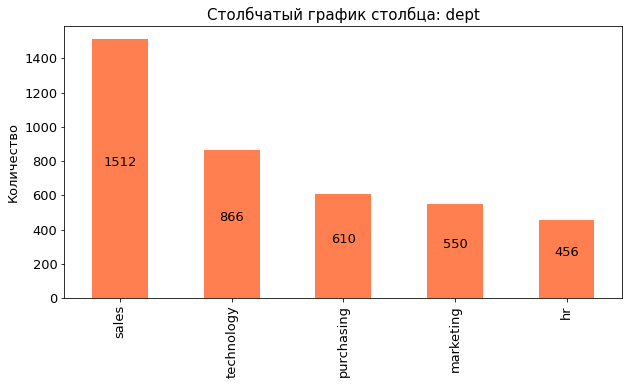

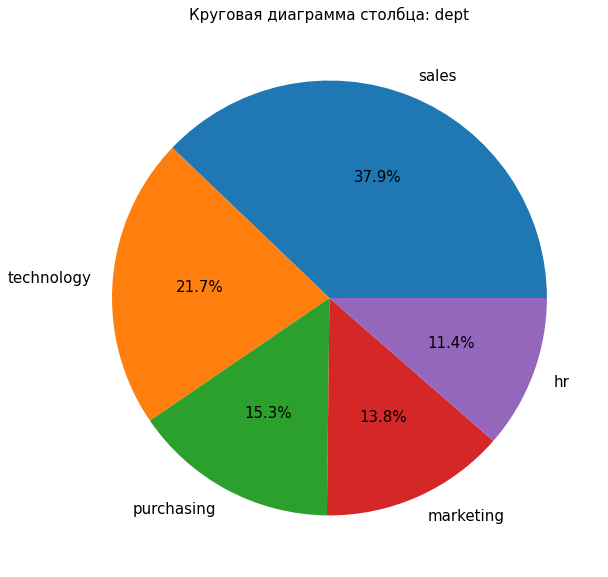

In [21]:
def category_data_graf(dataset, column):
    '''Данная функция берет на себя функцию построения столбчатой и круговой диаграммы, 
    для определния распределения и доли. 
    Аргументы:
    dataset - выбор датасета (значение без кавычек)
    columns - выбор столбца для построения графиков (значение в кавычках)'''
    
    data_cat_graf = dataset[column].value_counts()

    plt.figure(figsize=(10,5))
    data_cat_graf.plot(kind='bar', color='coral', fontsize=13)

    for i, val in enumerate(data_cat_graf.values):
        plt.text(i, val/2, int(val),
                 horizontalalignment='center', 
                 verticalalignment='bottom',
                 fontweight='book',
                 fontdict={'fontweight':1500, 'size':13},
                 )
    plt.title(f'Столбчатый график столбца: {column}', fontsize=15)
    plt.ylabel('Количество',fontsize=13)
    plt.show()
    
    plt.title(f'Круговая диаграмма столбца: {column}', fontsize=15)
    data_cat_graf.plot(kind='pie', figsize =(10,10), fontsize=15,
                       autopct=lambda p: '{:.1f}%'.format(p,(p/100)*data_cat_graf.sum()))
    plt.ylabel('')
    
category_data_graf(training_sample, 'dept')

Можно заметить, что почти 40% сотрдников соствляет отдел продаж. А вот 11.4% сотрудников из HR отдела лично меня удивляет, но уже какая есть компания

**Проверим распределение столбца level**

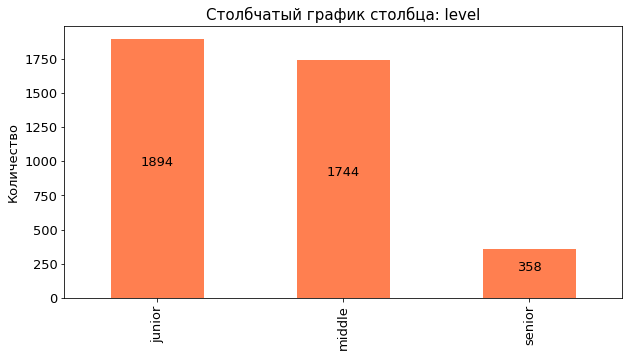

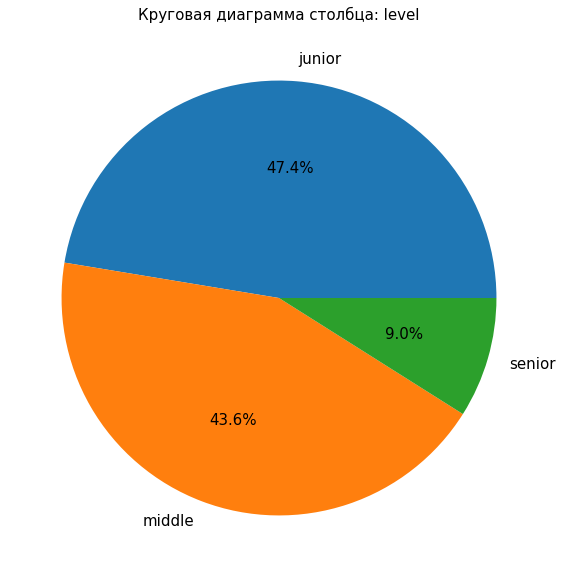

In [22]:
category_data_graf(training_sample, 'level')

Распределение junior и middle очень близко, а вот senior составляет 9% от всех сотрудников

**Проверим распределение столбца workload**

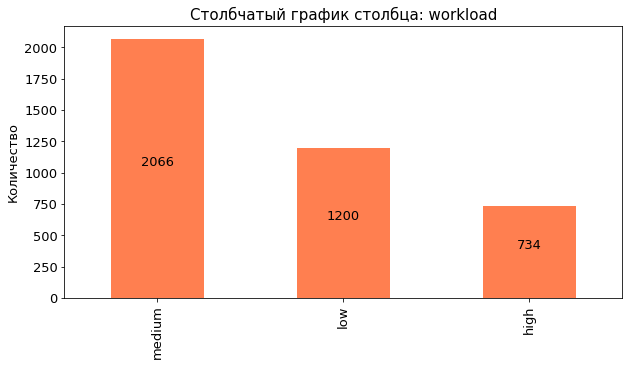

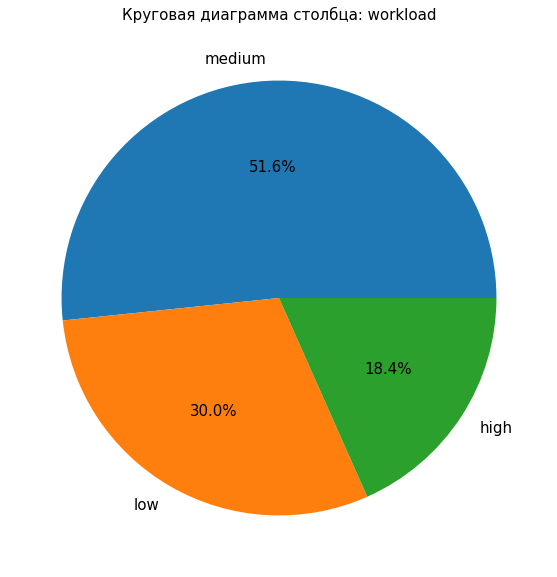

In [23]:
category_data_graf(training_sample, 'workload')

Половина сотрудников считают себя средне загруженными, а вот 18,4% считают, что они перегруженны рабочими задачами. Потенциально данный столбец будет очень сильно влиять на вероятность сотрудника покинуть текущее место работы

**Проверим распределение столбца last_year_promo**

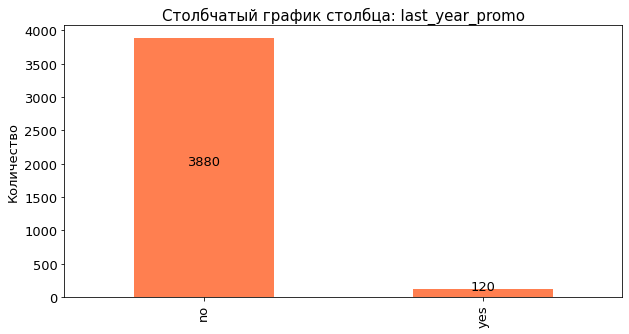

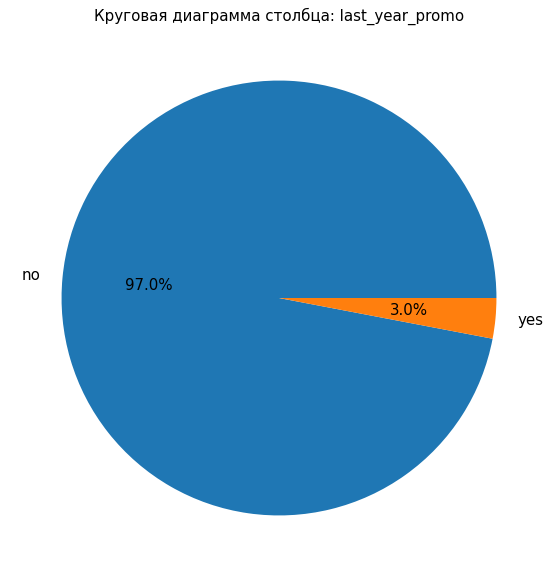

In [24]:
category_data_graf(training_sample, 'last_year_promo')

Как мы видим у 3% сотрудников было повышение за последний год

**Проверим распределение столбца last_year_violations**

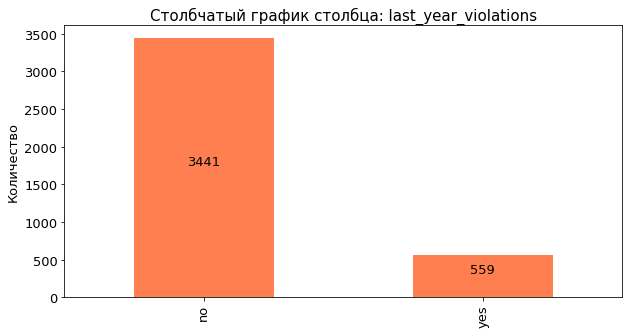

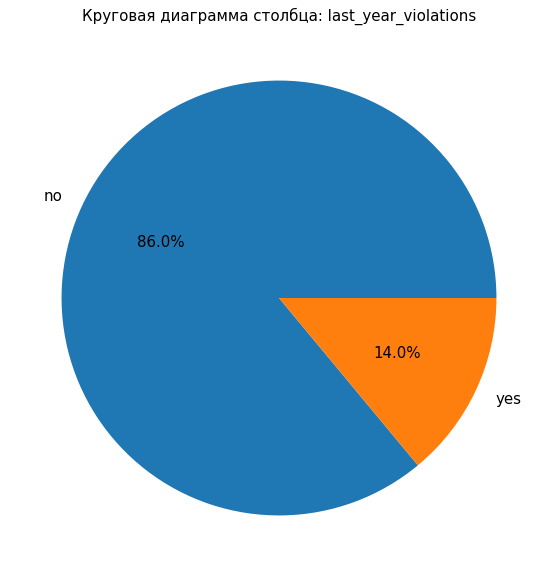

In [25]:
category_data_graf(training_sample, 'last_year_violations')

14% сотрудников нарушали трудовой договор за последний год. Довольно большая цифра для компании.

Столбцы employment_years и supervisor_evaluation являются дискретными, а значит к ним подойдет функция для проверки категориальных признаков.

**Проверим распределение столбца employment_years**

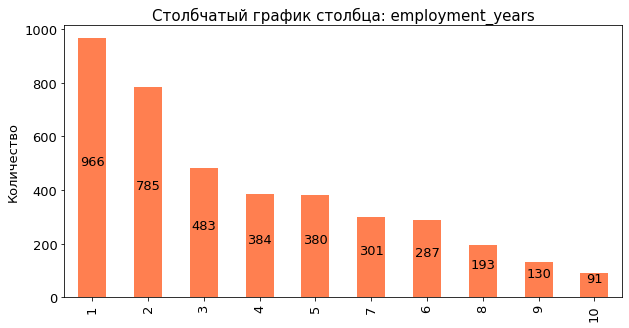

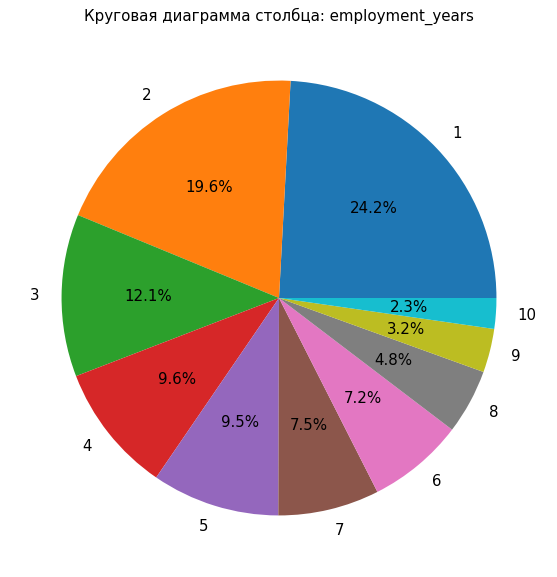

In [26]:
category_data_graf(training_sample, 'employment_years')

Можно заметить что значения идут по убыванию, кромен 6-7 месяца, но там очень близкие значения. В целом аномалии или выбросов нет

**Проверим распределение столбца supervisor_evaluation**

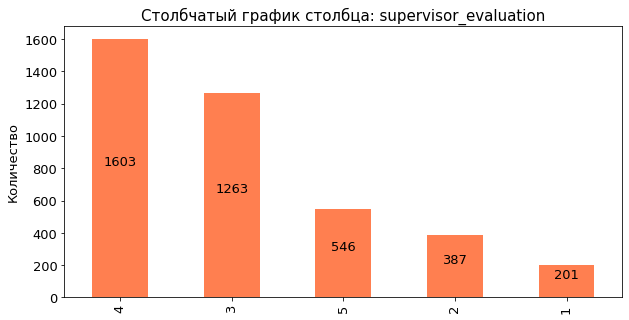

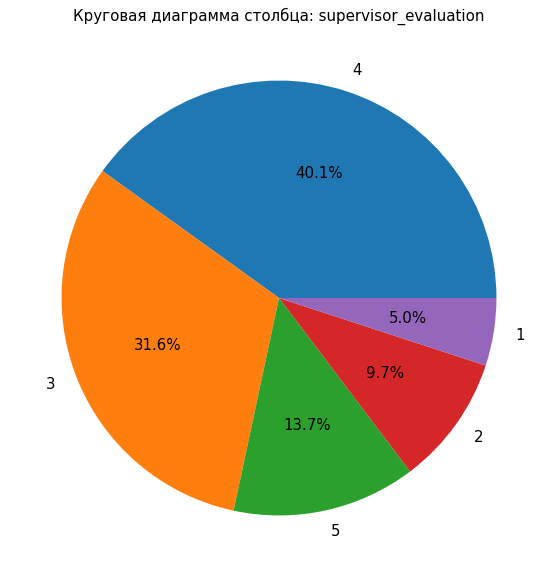

In [27]:
category_data_graf(training_sample, 'supervisor_evaluation')

Найбольшая оценка это 3 и 4. Доля едениц составляет порядка 5%. Аномалии и выбросов нет

<a id='section7'></a> 
### Анализ количественных столбцов training_sample

**Проверим распределение столбца salary**

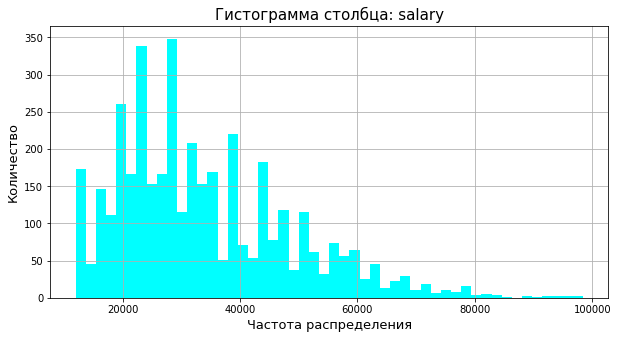

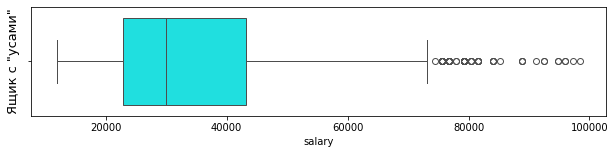

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


In [28]:
def number_data_graf(dataset, column, bins):
    '''Данная функция берет на себя функцию построения гистограммы, а также "Ящик с усами", 
    для определния распределения и выбросов. 
    Аргументы:
    dataset - выбор датасета (значение без кавычек)
    columns - выбор столбца для построения графиков (значение в кавычках)
    bins - число столбцов в гистограмме'''
    
    plt.figure(figsize=(10,5))
    dataset[column].hist(bins=bins, color='aqua')
    plt.title(f'Гистограмма столбца: {column}', fontsize=15)
    plt.xlabel('Частота распределения',fontsize=13)
    plt.ylabel('Количество',fontsize=13)
    plt.show()
    
    plt.figure(figsize=(10.3, 2))
    sns.boxplot(data=dataset[column], orient='h', color='aqua')
    plt.ylabel('Ящик с "усами"',fontsize=13)
    plt.show()
    
    print(dataset[column].describe())

number_data_graf(training_sample, 'salary', 50)

Средняя зарплата сотрудников составляет почти 34 тыс. Максимальная 98400. При этом зарплату около 80 тыс и более уже является для компании выбросом.

**Проверим распределение столбца job_satisfaction_rate**

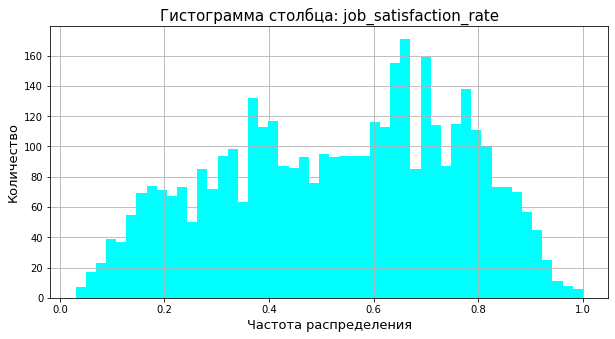

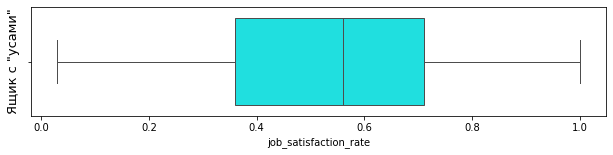

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [29]:
number_data_graf(training_sample, 'job_satisfaction_rate', 50)

Половина значений лежит в диапазоне от 0,36 до 0,71. Данное распределение больше похоже на бимодальное распределение, чем на нормальное. Для целевого признака это не критично.

<a id='section8'></a> 
### Анализ столбцов test_sample

Для тестовой выборки мы не будем детально анализировать каждый столбец, а лишь посмотрим на графики, чтобы выделить аномалии, если они есть.

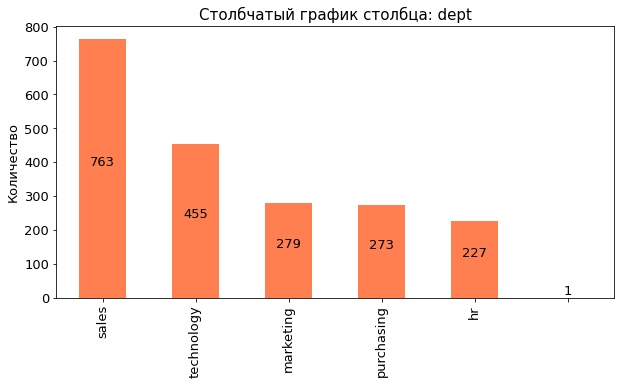

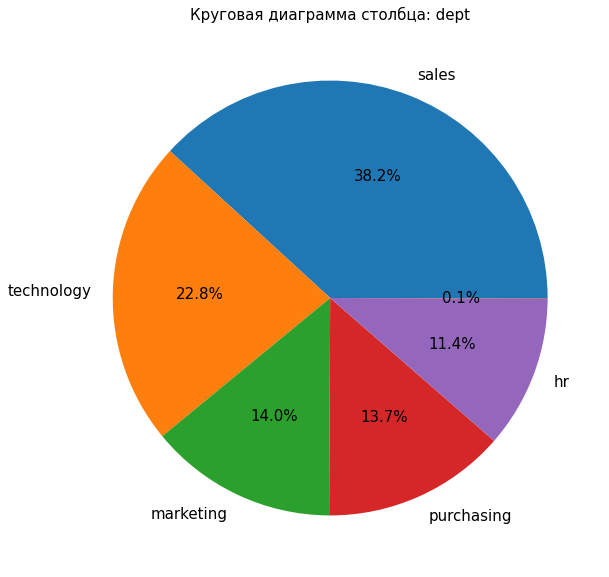

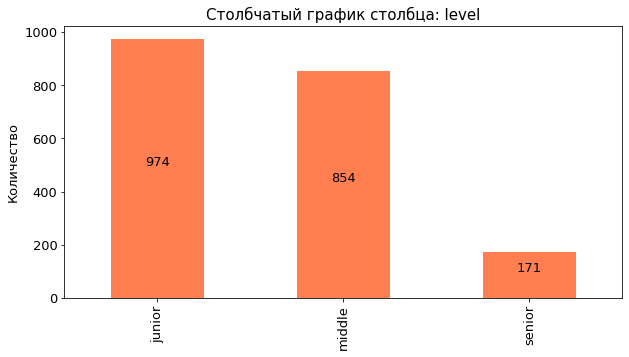

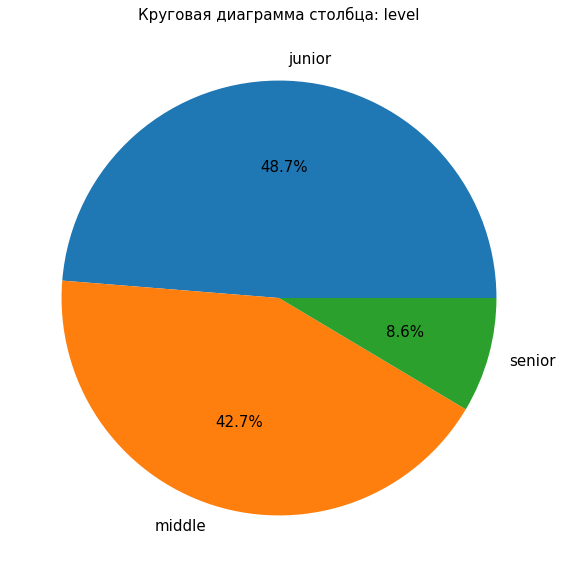

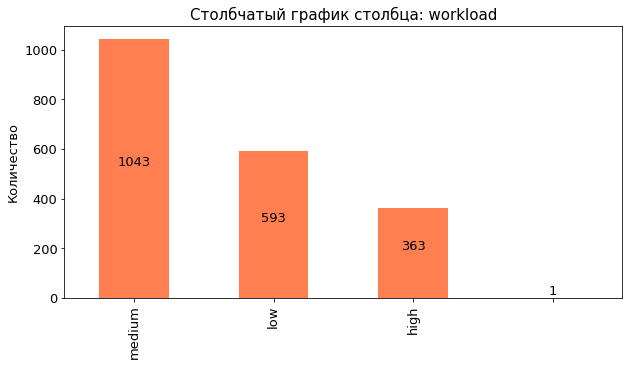

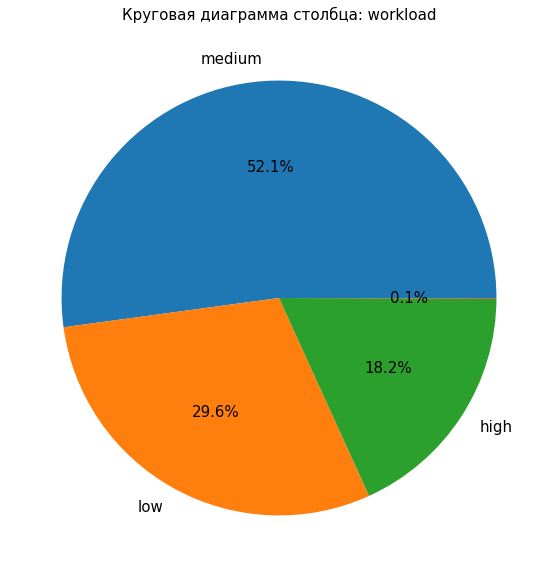

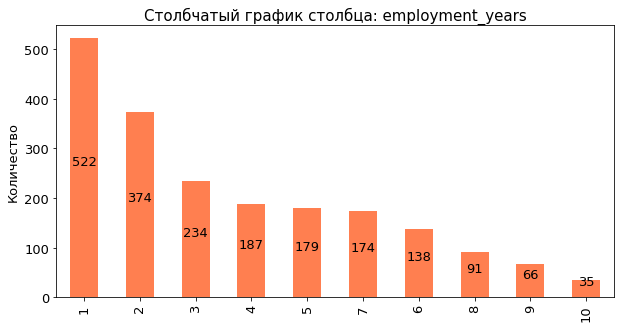

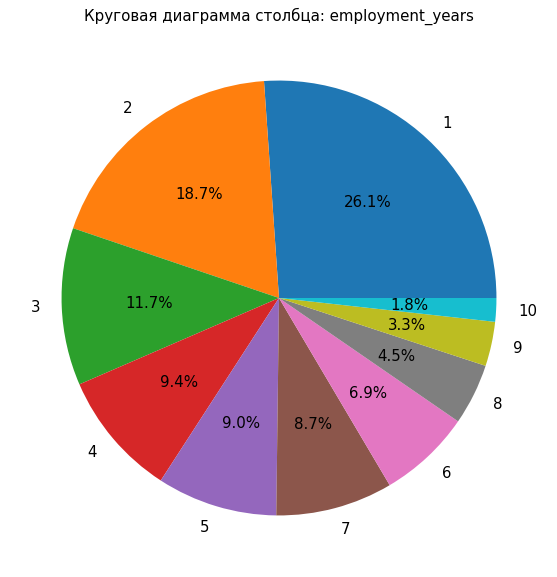

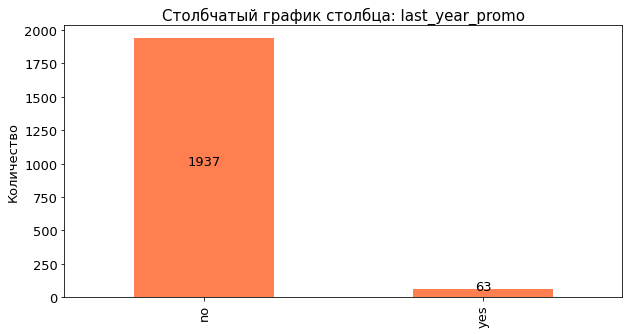

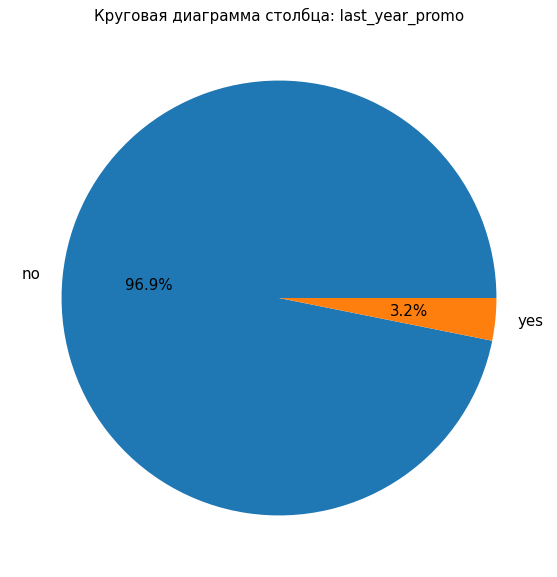

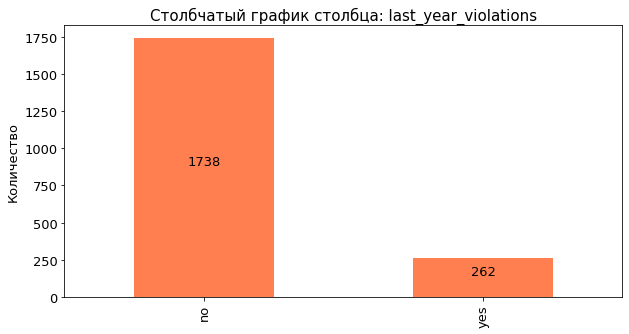

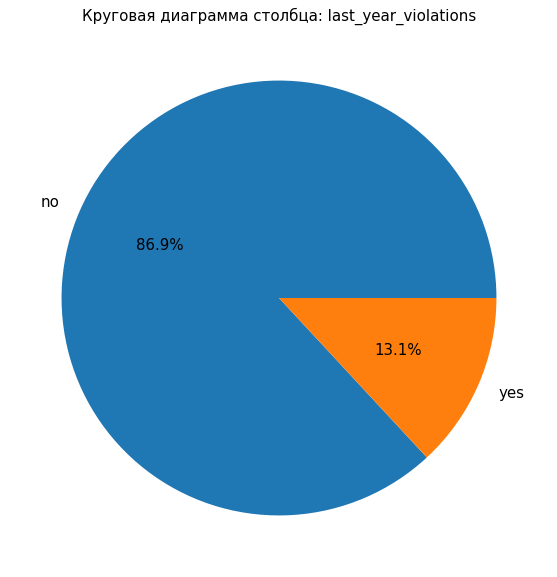

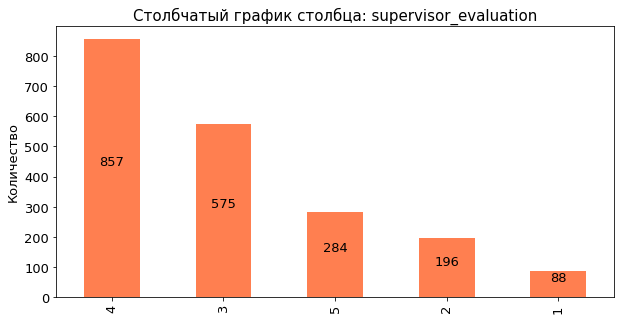

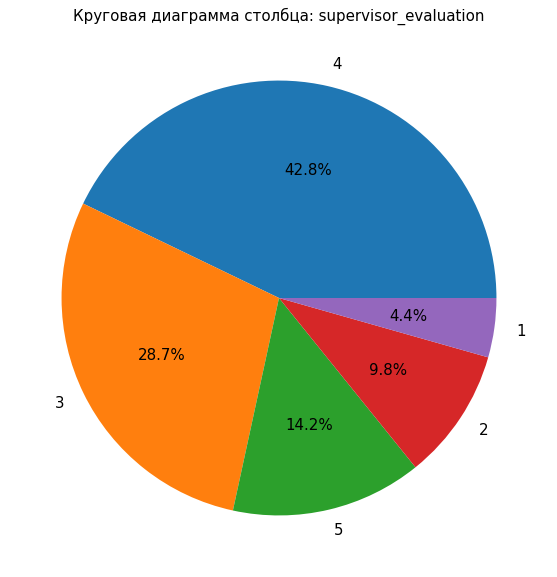

In [30]:
cat_col = ['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']
for i in cat_col:
    category_data_graf(test_sample, i)

Как мы видим, данные графиков тестовой выборки очень похожи на графики тренировочной выборки. Аномалии нет и спилитовку можно назвать сбалансированной. Теперь посмотрим на количественные столбцы

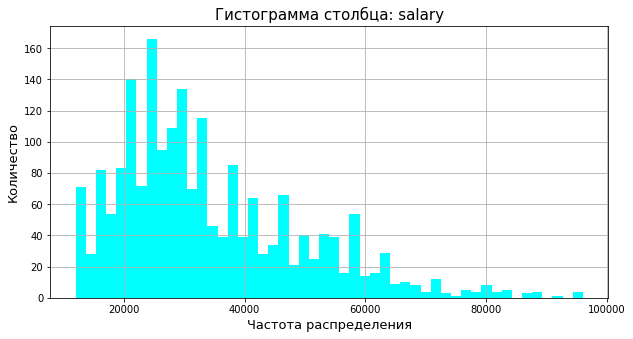

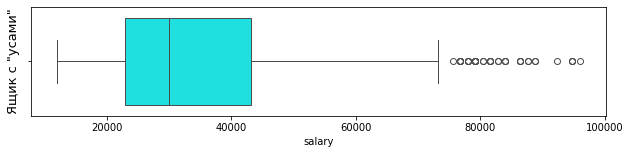

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [31]:
number_data_graf(test_sample, 'salary', 50)

Как мы видим тут у нас все хорошо и данные распределены, также как и в тренировочной выборке. Это позволяет судить о качестве выгружаемых данных, а также что была проделана грамотная работа по их распределению. В случае проблем с данными или неверной сплитовки между тренировочной и тестовой выбооркой, мы бы обратились к заказчику с просьбой объединить данные и рассплитовать их с помощью train_test_split с параметром stratify по целевому признаку, чтобы наша модель грамотно обучилась и учитывала, что существуют минорные и мажорные классы.

<a id='section9'></a> 
### Корреляционный анализ training_sample

Для некоторых видов модели очень важно проверить наличие мультиколлинеарности между признаками. Так как у нас есть категориальные столбцы, а их тоже хочется учесть, то мы воспользуемся методом PHIK, чтобы проверить данные в наших выборках

Создадим список с интервальными столбцами, чтобы матрица корреляции была точнее

In [32]:
interval_cols = ['salary', 'job_satisfaction_rate']

In [33]:
corr_data = training_sample.drop('id', axis= 1)

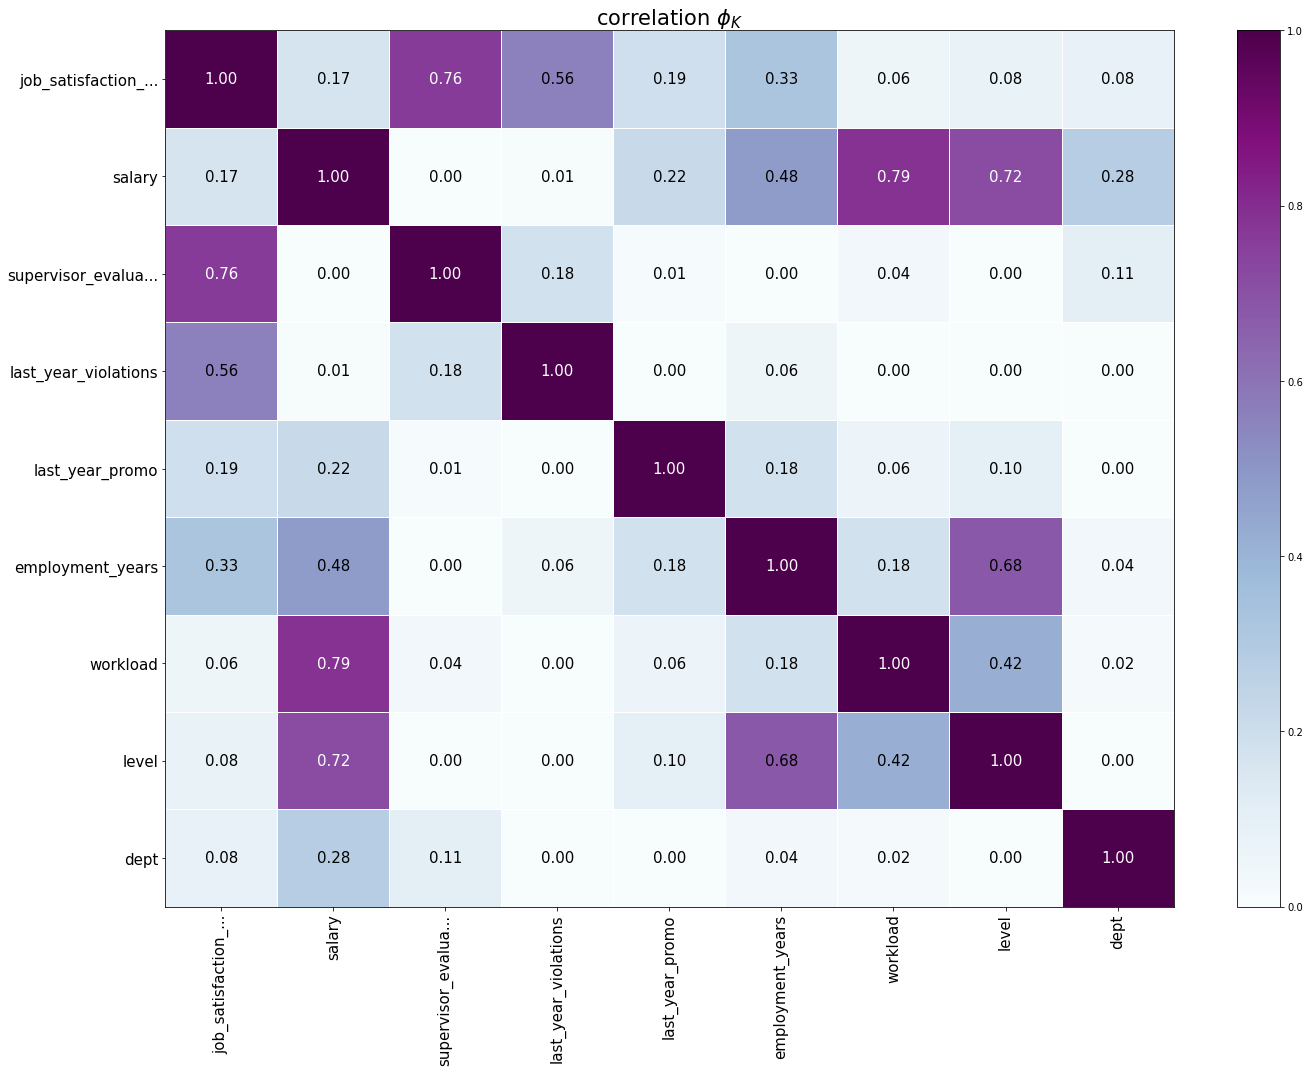

In [34]:
phik_overview = phik_matrix(corr_data, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='BuPu',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Как мы видим нет сильной корреляционной связи по шкале Чеддока, а самой сильной связью с нашим целевым признаком обладают столбцы supervisor_evaluation и last_year_violations. 

Теперь проанализируем тестовую выборку. Так как у нее отдельно стоит целевой признак, то мы его добавим, чтобы видеть общую картину.

In [35]:
corr_data = test_sample.merge(target_feature, on='id', how='outer')

In [36]:
corr_data.shape

(2000, 10)

In [37]:
corr_data = corr_data.set_index('id')

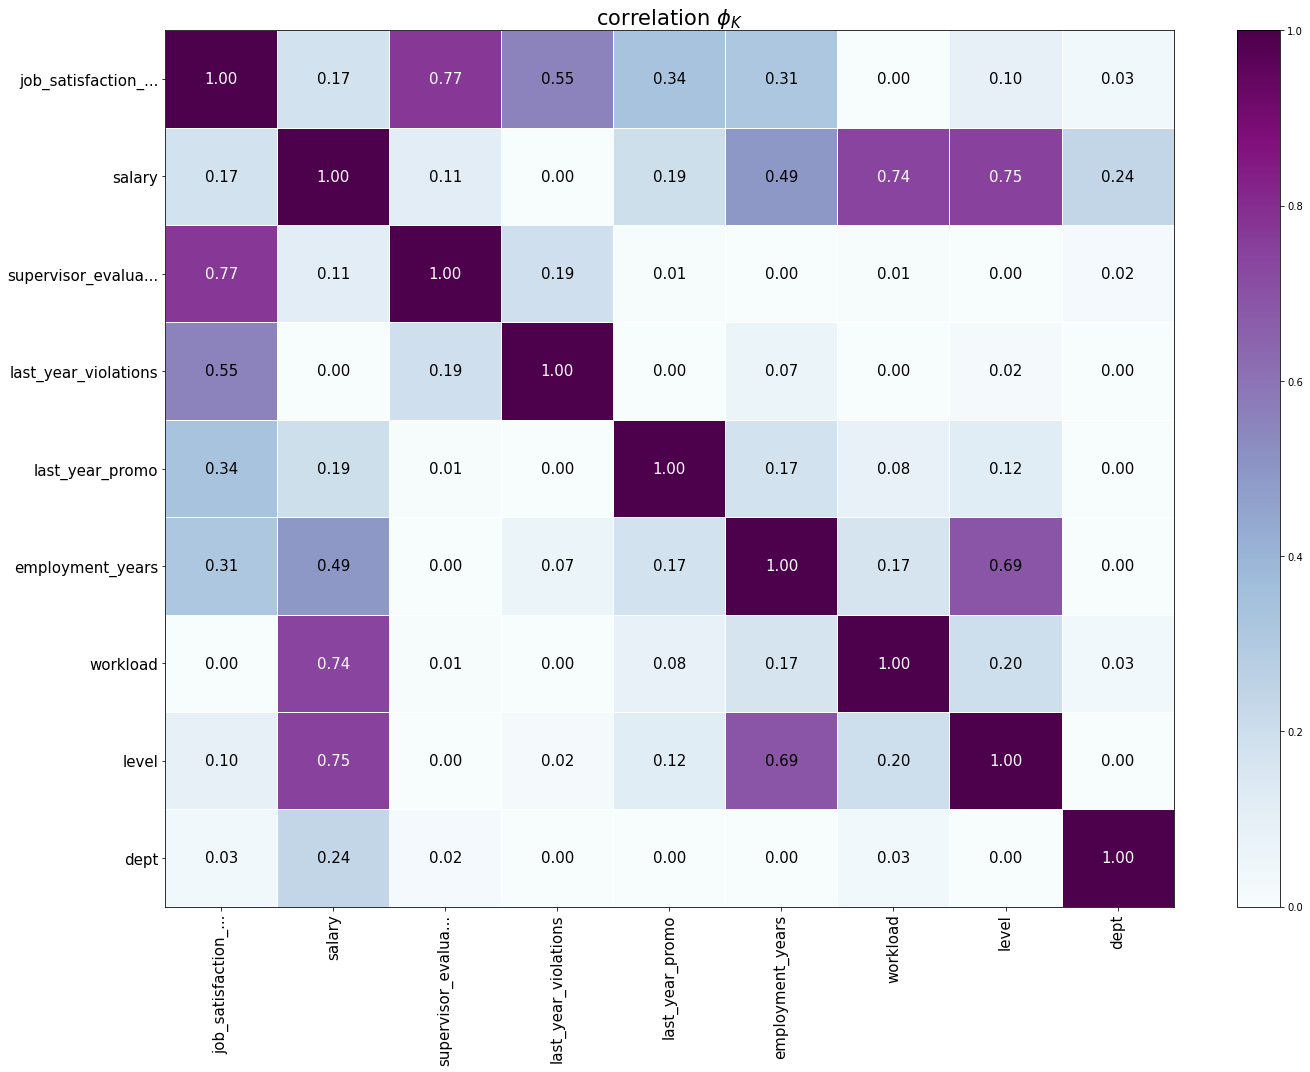

In [38]:
phik_overview = phik_matrix(corr_data, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='BuPu',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Как мы видим данные очень похожи, на данные в тренировочной выборке, а значит сильного дисбаланса в данных тренировочной и тестовой выборки у нас нет

## Задание 1 - Часть 4. Подготовка данных и Обучение моделей

<a id='section10'></a> 
### Создание пайплайна для подготовки данных модели

Для обработки данных мы создадим пайплайн, который будет преобразовывать столбцы. Он будет состоять из 3-х этапов: Кодирование количественных столбцов методом OheHotEncoder, Кодирование качественных столбцов методом OrdinalEncoder, Масштабирование данных

Создадим списки со столбцами для разных кодировщиков, а также для всех наших датасетов передем столбце id в индекс, чтобы объединение данных, в будущем, было правельным и данный столбец не влиял на нашу модель. До этого мы проверяли, что в столбце id все значения уникальны и нет пропусков.

In [39]:
training_sample = training_sample.set_index('id')
test_sample = test_sample.set_index('id')
target_feature = target_feature.set_index('id')

Когда мы перевели значение в Индекс у нас могут появится дубликаты. Если много значений одного типа, то модель может на них переобучится, а если на практике их не будет, то прогноз может оказаться неккоректным. Так что удалим все явные дубликаты. Это касается только тренировочной выборки, для теста нужно оставить все как есть

In [40]:
training_sample.duplicated().sum()

245

In [41]:
training_sample = training_sample.drop_duplicates()

In [42]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

ord_columns = ['level', 'workload']

num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

Теперь создадим для каждого типа столбцов свой пайплан предобработки данных. В данные пайплайны мы заложем дополнительный параметр SimpleImputer, чтобы пустые значения заменялись на моду, про что мы писали ранее. Поскольку мы видели, что в данных нет выбросов, а распределние признаков не является нормальным, то используем MinMaxScaller для количественных столбцов.

In [43]:
ohe_pipe = Pipeline(
    [
     ('simpleImputer_ohe_nan_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('simpleImputer_ohe', SimpleImputer(missing_values=' ', strategy='constant', fill_value=np.nan)),
     ('simpleImputer_ohe_nan_2', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ]
    )

ord_pipe = Pipeline(
    [
     ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('simpleImputer_ord_nan', SimpleImputer(missing_values=' ', strategy='constant', fill_value=np.nan)),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                    ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough', 
)

Итоговый пайплайн мы создадим в ячейке немного позже. Данная часть пайплайна служит для кодирования, масштабирования и заполнения пропусков в данных. Также мы учитываем дамми ловушку для ohe, неизвестные значения для ohe и ord, и приминяем пайплайн только для данных которые хранятся в наших переменных.

<a id='section11'></a> 
### Обучение модели Линейной регрессии

Зафиксируем наши константы

In [44]:
RANDOM_STATE = 66

Создадим переменные с привычным названием для модели.

In [45]:
X_train = training_sample.drop(['job_satisfaction_rate'], axis=1)

X_test = corr_data.drop(['job_satisfaction_rate'], axis=1)

y_train = training_sample['job_satisfaction_rate']

y_test = corr_data['job_satisfaction_rate']

Теперь обучим модель и получим предсказания.

In [46]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [47]:
param_grid = [
    {
        'models': [LinearRegression()],
    }
]

Проверку качества данной модели будем делать с помощью метрики SMAPE. Напишем функцию, которая будет считать данную метрику.

In [48]:
def smape(y_pred, y_true):
    return 100 / len(y_true) * np.sum(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

Создаем собственную переменную для проверки качества модели, чтобы передать ее в scoring. Таким образом будет верно определены гиперпараметры нашей модели. В данном случае я разделил этот раздел на 2 части, чтобы получить отдельные оценки, поэтому тут не будет гиперпаматеров, а только кросс валидация.

In [49]:
score = make_scorer(smape, greater_is_better=False)

Теперь обучим модель и получим предсказания.

In [50]:
gs = GridSearchCV(
  pipe_final,
  param_grid,
  scoring=score,
  n_jobs=-1,
  cv=5
) 

In [51]:
gs.fit(X_train, y_train)

print('Метрика SMAPE на кросс-валидационной выборке для линейной модели составляет:', (gs.best_score_).round(2)*-1)

Метрика SMAPE на кросс-валидационной выборке для линейной модели составляет: 25.01


<a id='section12'></a> 
### Обучение модели Дерево решении

Для модели дерево решении мы используем перебор гиперпараметров, чтобы найти самую лучшую. их комбинацию.

In [52]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 25),
        'models__max_features': range(2, 25),
        'models__min_samples_split': range(2, 25),
        'models__min_samples_leaf': range(2, 25),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Создаем переменную для перепроверки всех гиперпараметров.

In [53]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=score,
    n_jobs=-1,
    n_iter=100,
    random_state=RANDOM_STATE
)

Обучаем модель

In [54]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe_nan_1',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('simpleImputer_ohe',
                                                                                                SimpleImputer(fill_value=nan,
                                                                                                              missing_values=' ',
                                                                                                              strategy='constant')),
                                                                                               ('simpleImputer_ohe_nan_2',
                                                                                                SimpleImputer(strate...
                   param_distributions=[{'models': [DecisionTreeRegressor(random_state=66)],
                                         'models__max_depth': range(2, 25),
                                         'models__max_features': range(2, 25),
                                         'models__min_samples_leaf': range(2, 25),
                                         'models__min_samples_split': range(2, 25),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=66,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

Выведем результаты нашей модели

In [55]:
print('Лучшие параметры дерева решении:', randomized_search.best_params_, '\n')
print ('Метрика SMAPE на кросс-валидации:', (randomized_search.best_score_).round(2)*-1)

Лучшие параметры дерева решении: {'preprocessor__num': StandardScaler(), 'models__min_samples_split': 13, 'models__min_samples_leaf': 5, 'models__max_features': 14, 'models__max_depth': 20, 'models': DecisionTreeRegressor(random_state=66)} 

Метрика SMAPE на кросс-валидации: 15.35


Теперь посмотрим как наши модели справляются с валидационной выборкой.

In [56]:
y_pred_lr_val = gs.predict(X_test)
y_pred_tree_val = randomized_search.predict(X_test)
print('Метрика SMAPE кросс-валидации для линейной модели составляет:', 
      (gs.best_score_).round(2)*-1, '\n')
print('_'*100, '\n')
print('Метрика SMAPE кросс-валидации для дерева решений составляет:', 
      ((randomized_search.best_score_)*-1).round(2), '\n')

Метрика SMAPE кросс-валидации для линейной модели составляет: 25.01 

____________________________________________________________________________________________________ 

Метрика SMAPE кросс-валидации для дерева решений составляет: 15.35 



Модель Дерева решении показывает лучшие значения метрики, а значит протестируем ее для нашей тестовой выборки

<a id='section13'></a> 
### Тестирование модели Дерево решении

Так как мы выбрали для решения модель Дерево решении, то сделам предсказание на лучших параметрах данной модели.

In [57]:
y_pred_tree_test = randomized_search.predict(X_test)

Теперь посмотрим на получившуюся метрику. Заказчик признает модель рабочей, если значение SMAPE будет меньше или равно 15.

In [58]:
print('Метрика SMAPE тестовой выборки для дерева решений составляет:', 
      smape(y_pred_tree_test, y_test).round(2))

Метрика SMAPE тестовой выборки для дерева решений составляет: 13.6


Наша модель показала результат меньше 15 на тестовой выборке, а значит требования заказчика мы выполнили.


## Промежуточный вывод по Заданию 1

Данная задача была задачей логистической регрессии. Для нее мы использовали 2 модели: Логистической регрессии и Дерева решении.

Для модели логистической регрессии очень важна линейная зависимости и она сильно страдает от мультиколлениарности признаков. Модель дерева решении лишина этих недостатков, однако нужно очень осторожно подходить к настройке ее гиперпараметров, так как она страдает от проблемы переобучения, поэтому важно делать проверку ее настроек на валидационной или тестовой выборке, чтобы исключить данную проблему. 

Поскольку не все признаки были связаны линейно с целевым, а также наличием мультиколлениарности между зарплатой и загруженностью сказались на модели Линейной регрессии и наша метрика показала значение 25. Для настройки гиперпараметров дерева решении мы использовали метод RandomizedSearchCV, а также проверка метрики на 3 выборках посволила нам подобрать оптимальные параметры и сделать ее лучшей моделью для данной задачи с оценкой SMAPE в 14,06 для тестовых данных, а также не допустить ее переобучение.

## Задание 2 - Часть 1. Загрузка данных

<a id='section14'></a> 
### Загрузка новых данных

In [59]:
training_quit = pd.read_csv('/datasets/train_quit.csv')
target_quit = pd.read_csv('/datasets/test_target_quit.csv')

**training_quit** содержит данные тренировочной выборки, но в этот раз указан новый целевой признак - увольнение сотрудника.

**target_quit** целевой признак тестовой выборки. Основные признаки тестовой выборки остались без изменения и содержатся в файле **test_sample**

## Задание 2 - Часть 2. Предобработка данных

<a id='section15'></a> 
### Изучение файла training_quit

Изучение данного файла будет состоять из тех же шагов, что и до этото:
- проверка столбцов
- проверка на пропуски и тип данных
- проверка неявных дубликатов в категориальных столбцах
- проверка уникальных id для исключения явных дубликатов

In [60]:
training_quit.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


Со столбцами все хорошо

In [61]:
training_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Типы данных в норме. Пропуска отсутствуют

In [62]:
cat_col = list(training_quit.select_dtypes(['object']).columns)
for i in cat_col:
    print(f'Уникальные значения в столбце {i}: {training_quit[i].unique()}', '\n')

Уникальные значения в столбце dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr'] 

Уникальные значения в столбце level: ['middle' 'junior' 'sinior'] 

Уникальные значения в столбце workload: ['high' 'medium' 'low'] 

Уникальные значения в столбце last_year_promo: ['no' 'yes'] 

Уникальные значения в столбце last_year_violations: ['no' 'yes'] 

Уникальные значения в столбце quit: ['no' 'yes'] 



Неявных дубликатов нет. Как и до этого заменим лишь одно значение

In [63]:
training_quit['level'] = training_quit['level'].replace('sinior', 'senior', regex=True)

In [64]:
training_quit['id'].nunique()

4000

Все id уникальны, а значит дублей нет

<a id='section16'></a> 
### Изучение файла target_quit

In [65]:
target_quit.head(10)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


In [66]:
target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Тут с данными тоже все хорошо. Можно переходить к исследовательскому анализу данных

## Задание 2 - Часть 3. Исследовательский анализ данных

<a id='section22'></a> 
### Анализ столбцов training_quit

Так как файлы с похожей структурой, то воспользуемся предыдущей функцией

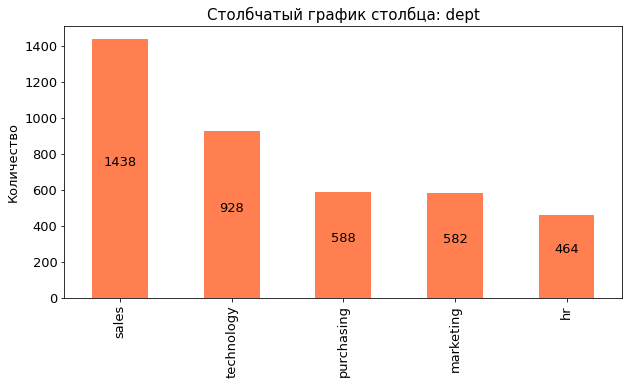

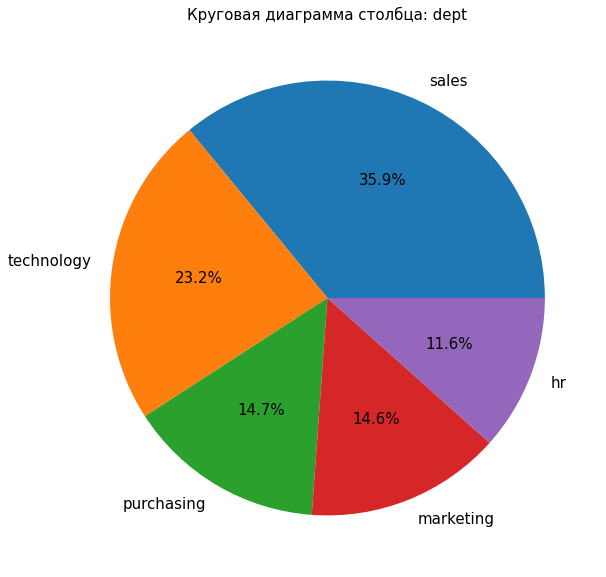

In [67]:
category_data_graf(training_quit, 'dept')

Данные распределены также как и в предыдущей выборке

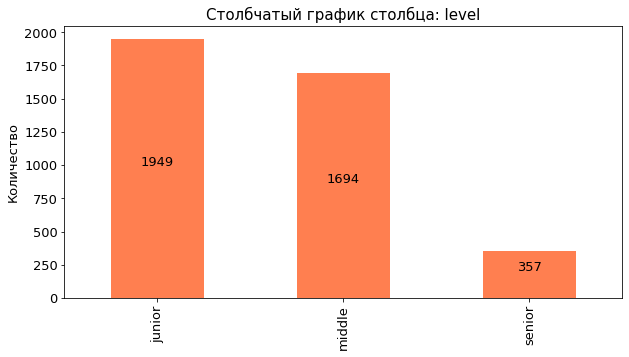

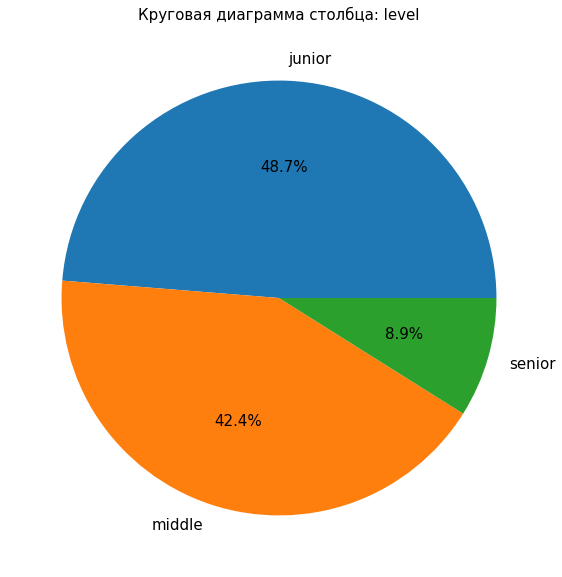

In [68]:
category_data_graf(training_quit, 'level')

В данном случае у нас больше junior чем в прошлой тестовой выборке, но общее соотношение примерно такое же

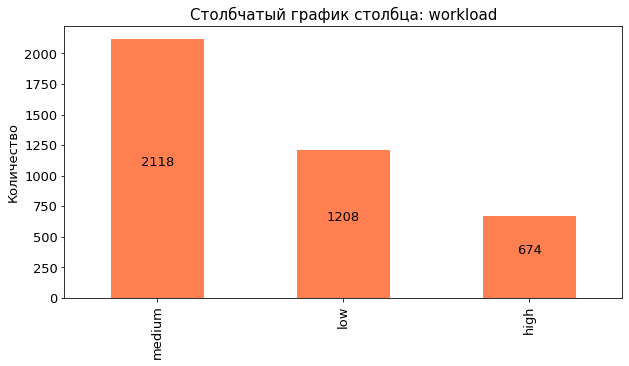

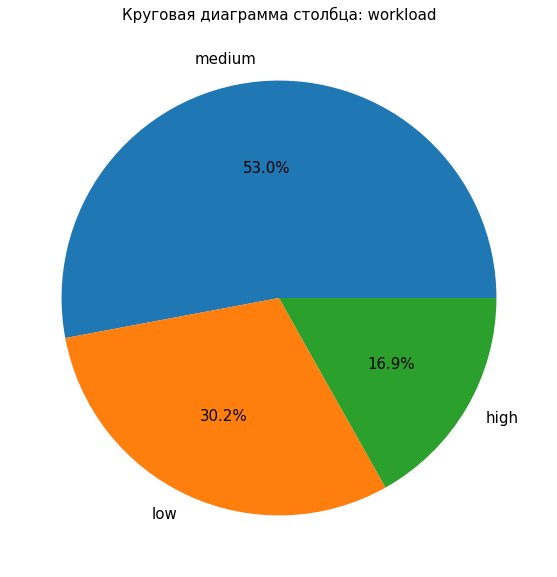

In [69]:
category_data_graf(training_quit, 'workload')

Распределение похоже на прошлый файл, только чуть больше сотрудников со средней загрузкой

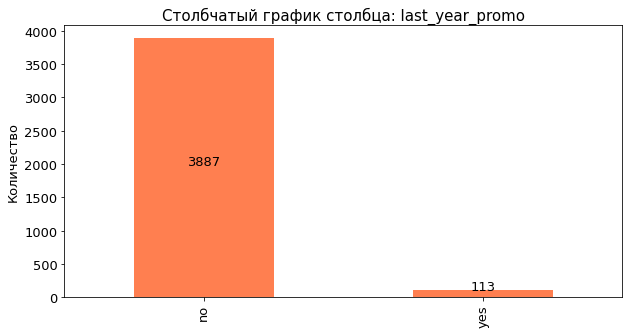

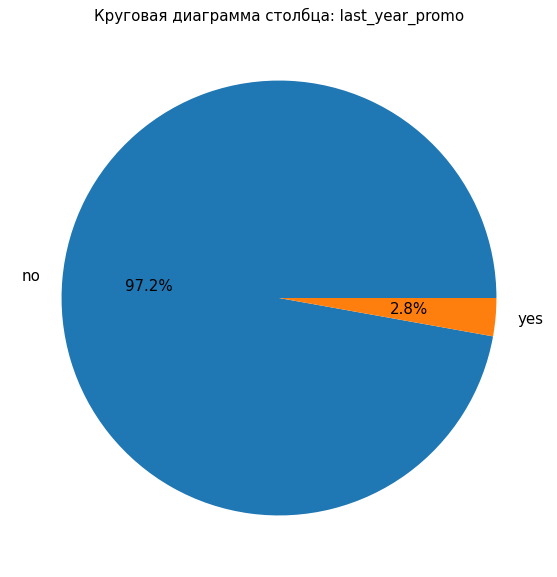

In [70]:
category_data_graf(training_quit, 'last_year_promo')

Аналогичное распределение для данной категории

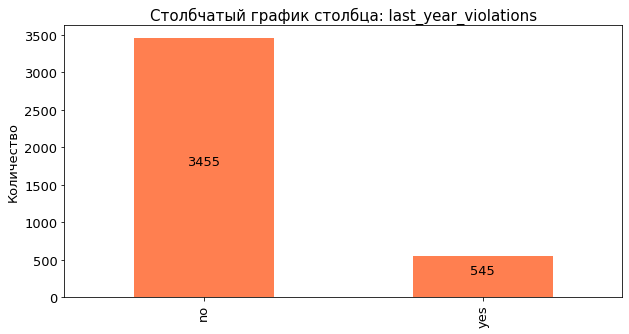

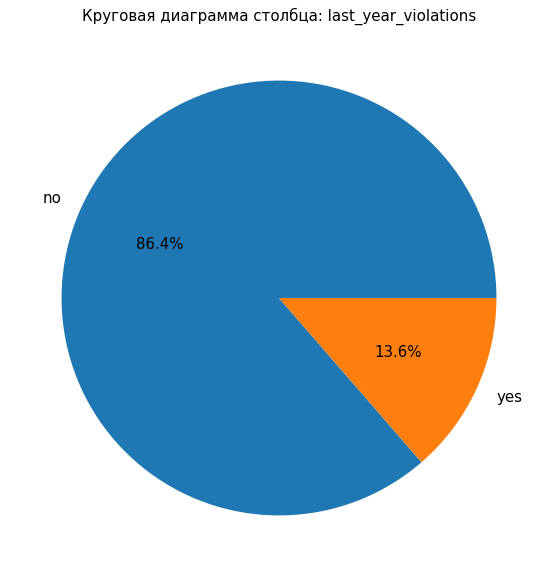

In [71]:
category_data_graf(training_quit, 'last_year_violations')

Аномалии тоже нет и данные похожи на прошлый файл

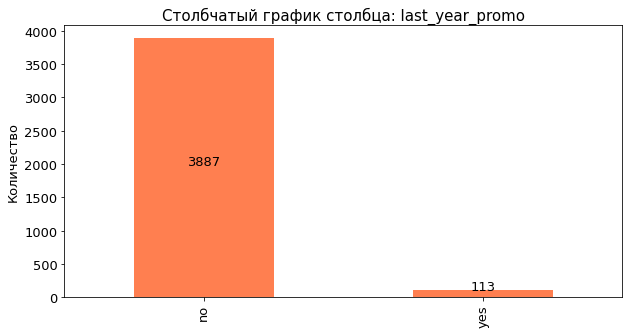

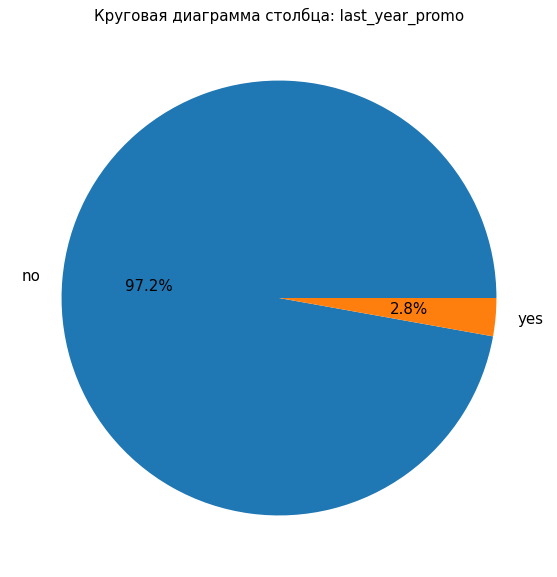

In [72]:
category_data_graf(training_quit, 'last_year_promo')

Аномалии не обнаружено

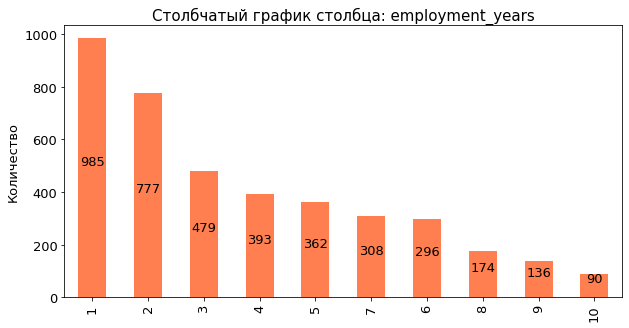

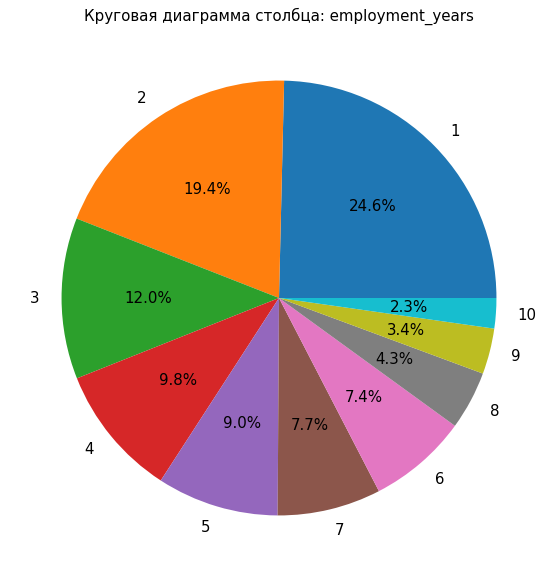

In [73]:
category_data_graf(training_quit, 'employment_years')

Такая же закономерность, что и в файле training_sample. Даже оценки 6 и 7 также распределены

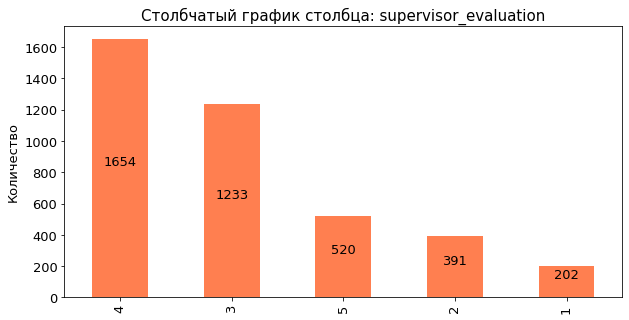

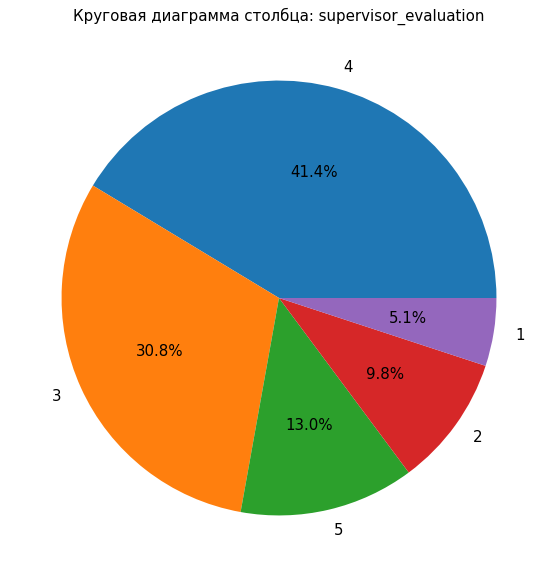

In [74]:
category_data_graf(training_quit, 'supervisor_evaluation')

Такое же распределение, а это значит, что можно пользоваться прошлой моделью, так как категориальные признаки распределены идентичным образом и можно не волноваться, что модель к ним не приспособилась

Теперь пойдем к количественным столбцам

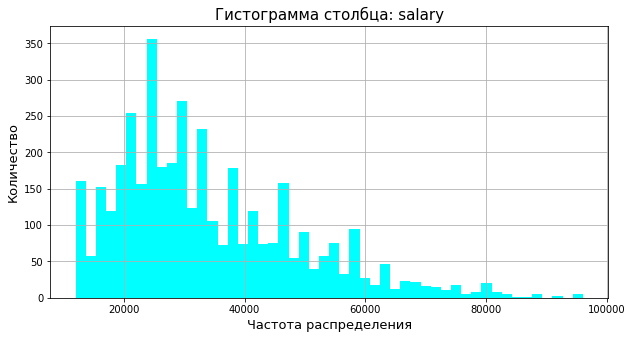

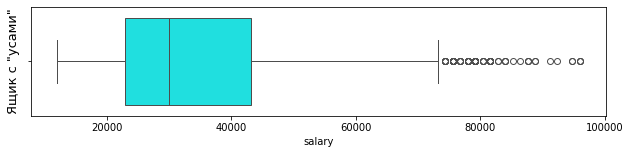

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [75]:
number_data_graf(training_quit, 'salary', 50)

Данные похожи на наш предыдущий файл. Даже среднее значение не сильно отличается

Теперь проверим корреляцию

In [76]:
corr_data = training_quit.set_index('id')

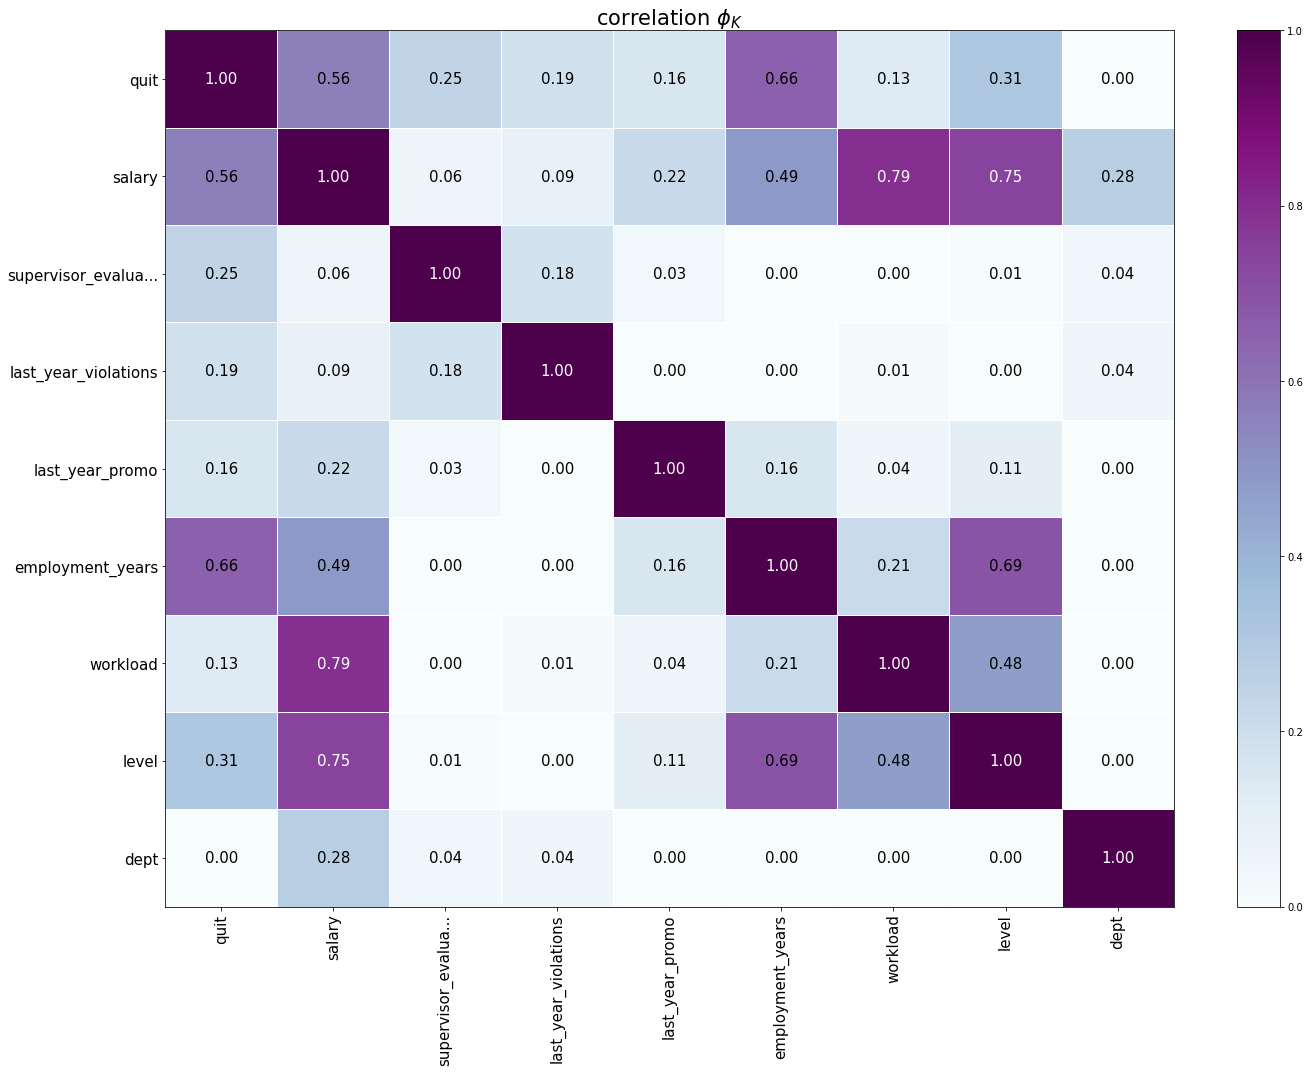

In [77]:
phik_overview = phik_matrix(corr_data, interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='BuPu',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Высокой мультиколлениарности нет, а самая сильная зависимость нашего целевого признака у зарплаты и времени работы. Позже проверим считает ли также наша модель МО

<a id='section17'></a> 
### Создание портрета уволенных сотрудников

Для данного анализа мы сосредаточимся на нашем новом целевом показаетеле quit.

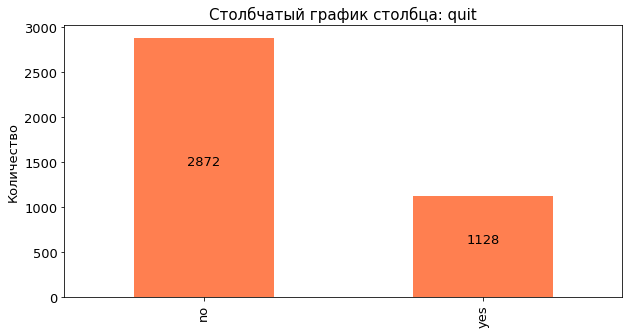

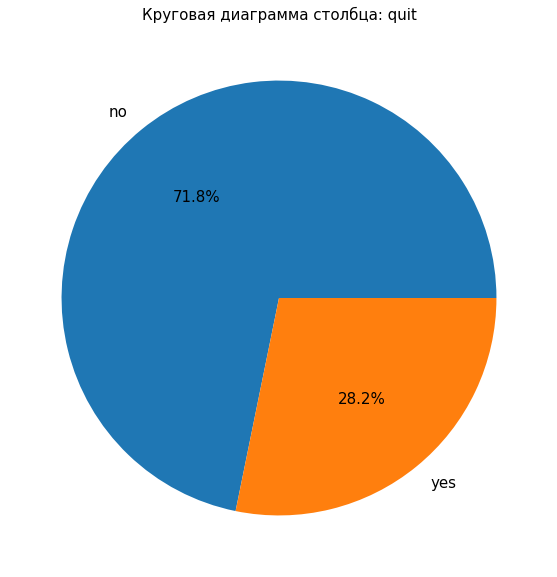

In [78]:
category_data_graf(training_quit, 'quit')

Как мы видим распределени 70 на 30% в наших данных

Теперь напишем функцию которая будет выводить 2 графика для более наглядного сравнения столбца quit

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


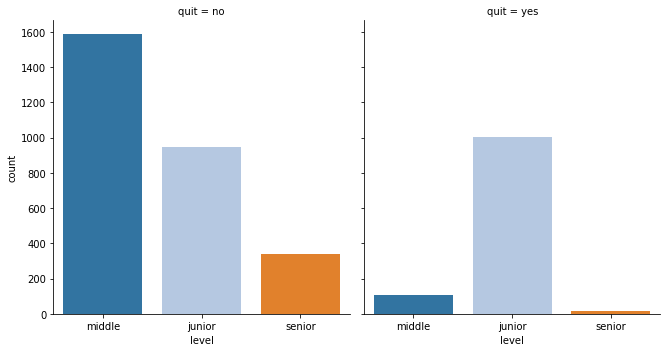

In [79]:
def catplot(dataset, x, column):
    '''Данная функция берет на себя функцию построения столбчатой диаграммы, 
    для сравнения распределния данных двух признаков. 
    Аргументы:
    dataset - выбор датасета (значение без кавычек)
    x - столбец оси X (значение в кавычках)
    column - столбец для построения графиков (значение в кавычках)'''
    
    sns.catplot(x=x, col=column, col_wrap=4,
                data=dataset[dataset.notnull()],
                kind="count", height=5, aspect=.9, 
                palette='tab20')

    
catplot(training_quit, 'level', 'quit');

Как мы видим больше всего увольнения среди junior. Их даже больше работающих. Далее количество увольнений резко сокращается

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


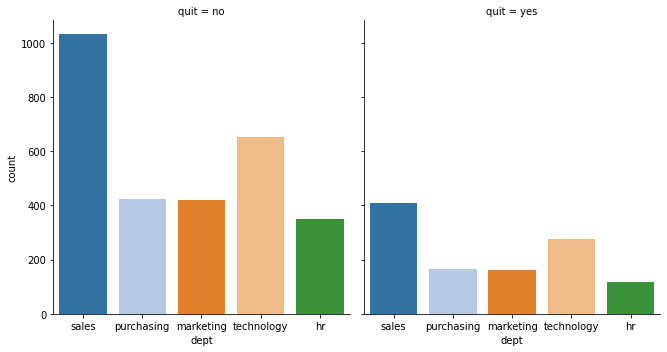

In [80]:
catplot(training_quit, 'dept', 'quit')

Среди отделов сложно выделить отдельный, так как увольнения и работающие примерно в одной пропорции

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


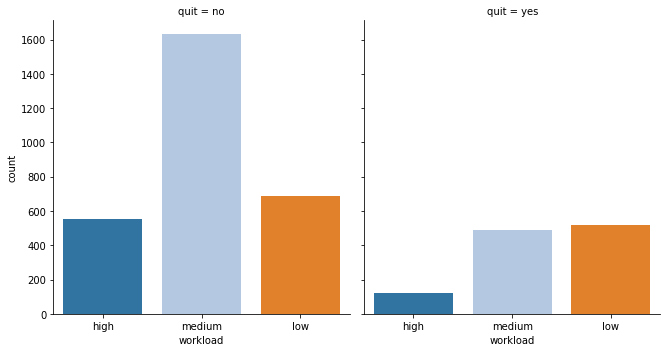

In [81]:
catplot(training_quit, 'workload', 'quit')

Как мы видим, чем меньше загрузка, тем больше шанс на увольнение.

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


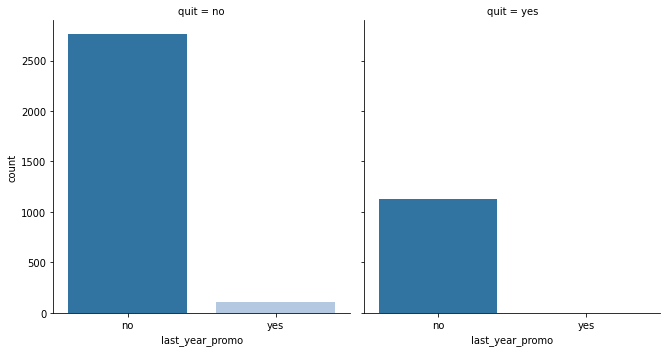

In [82]:
catplot(training_quit, 'last_year_promo', 'quit')

Если тебе предложили повышение, то это показатель того, что тебя не уволят, только если ты сам захочешь

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


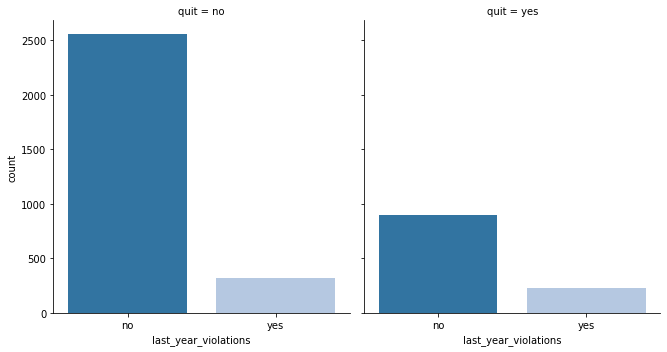

In [83]:
catplot(training_quit, 'last_year_violations', 'quit')

Нарушение трудового договора влияет на увольнение. Данные не разделились пропроционально и больший шанс на увольнение с нарушением условии контракта

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


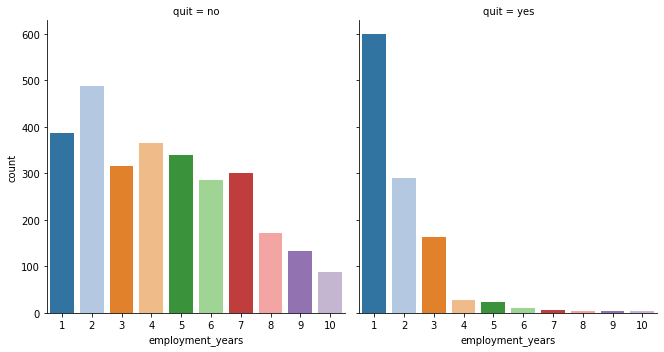

In [84]:
catplot(training_quit, 'employment_years', 'quit')

Как видно, увольнения происходят в первые года работы, а дальше начинают падать

/tmp/ipykernel_268/3252447632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=x, col=column, col_wrap=4,


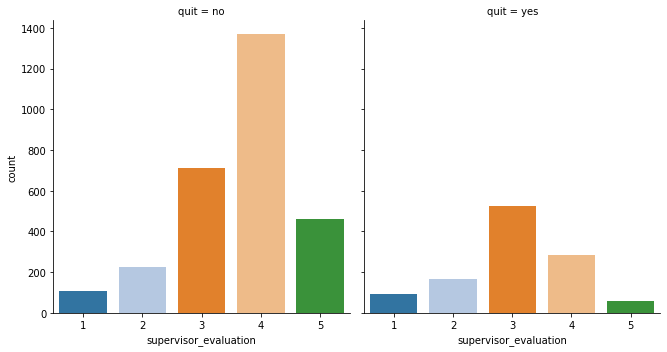

In [85]:
catplot(training_quit, 'supervisor_evaluation', 'quit')

Как мы видим нет такого эффекта, что большинство уволенных получают оценку 1, а затем идет снижение. Однако имея оценку 4-5 шанс на увольнение снижается. 

Данное распределение показывает только в количественном выражении. Сделаем отдельную функцию, чтобы проверить нормальное распределение данных признаков, чтобы проанализировать этот момент с другой стороны

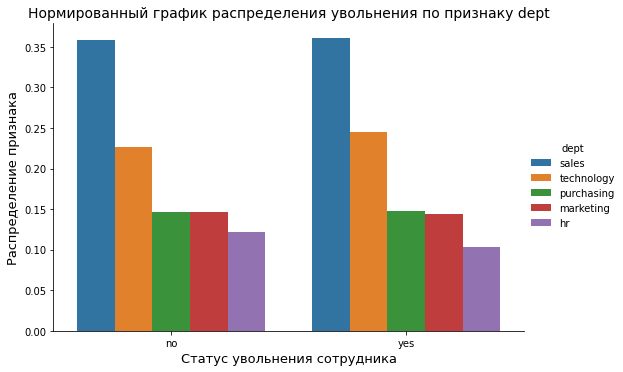

____________________________________________________________________________________________________ 



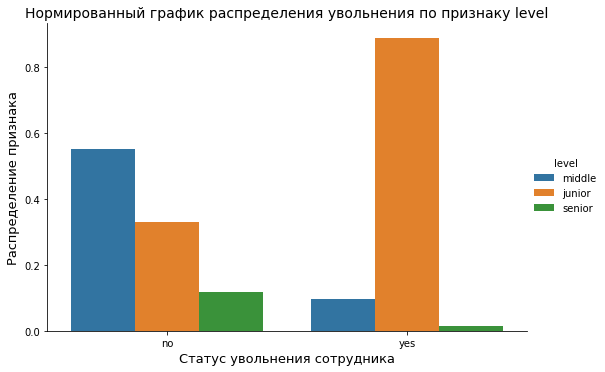

____________________________________________________________________________________________________ 



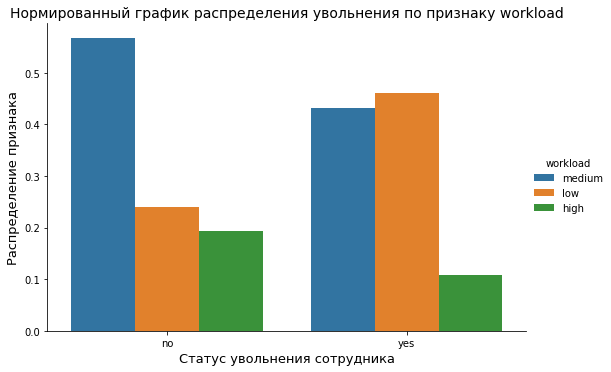

____________________________________________________________________________________________________ 



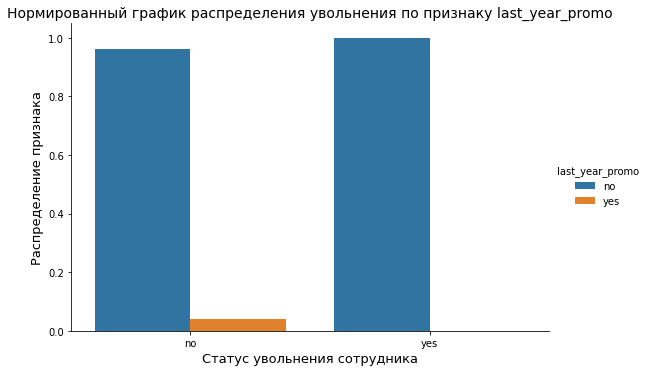

____________________________________________________________________________________________________ 



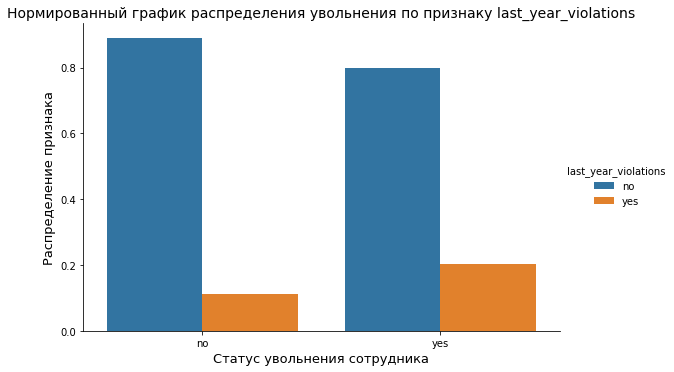

____________________________________________________________________________________________________ 



In [86]:
for column in training_quit.columns.drop('quit'):
    if training_quit[column].dtypes == 'object':
        x,y = 'quit', column
        graph = (training_quit.groupby('quit')[column]
                 .value_counts(normalize=True)
                 .rename('percent')
                 .reset_index()
                 .pipe((sns.catplot, 'data'), x=x, y='percent', hue=y, kind='bar', height=5, aspect=1.5))
        plt.title(f'Нормированный график распределения увольнения по признаку {column}', fontsize=14)
        plt.ylabel('Распределение признака', fontsize=13)
        plt.xlabel('Статус увольнения сотрудника', fontsize=13)
        plt.show()
        print('_'*100, '\n')

Как мы видим по распределению картина примерно такая же и отдельных аномалии нет

Теперь объеденим все тестовые датафреймы, чтобы проанализировать **job_satisfaction_rate** и проверим размерность, чтобы убедится в 

In [87]:
full_test_data = test_sample.merge(target_feature, on='id', how='outer')
full_test_data = full_test_data.merge(target_quit, on='id', how='outer')

In [88]:
full_test_data.shape

(2000, 11)

Теперь проверим распределение удовлетворенности сотрудников и их увольнения 

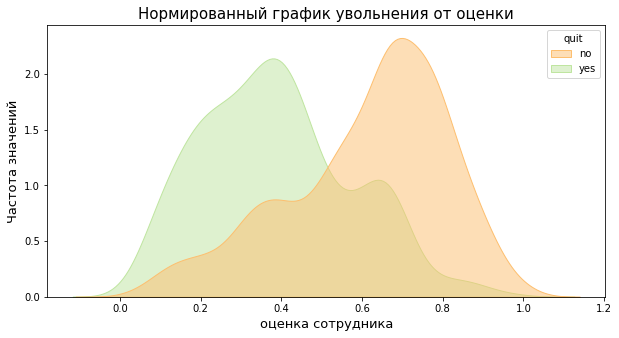

In [89]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=full_test_data, x='job_satisfaction_rate', hue='quit', common_norm=False,
           palette="Spectral", fill=True, alpha=.5)
plt.title('Нормированный график увольнения от оценки', fontsize=15)
plt.xlabel('оценка сотрудника',fontsize=13)
plt.ylabel('Частота значений',fontsize=13);

In [90]:
full_test_data.groupby('quit')['job_satisfaction_rate'].mean().round(2)

quit
no     0.61
yes    0.39
Name: job_satisfaction_rate, dtype: float64

Как видно из графика большенство уволенных сотрудников имеют оценку от 0.2 до 0.6 и их средняя оценка 0.39. У текущих сотрудников  средняя оценка 0.61. Однако я бы пореккомендовал junior с оценкой ниже 0.5, а также малой загруженность поволноваться, так как по результам портрета у них высок шанс на увольнение в ближайшее время

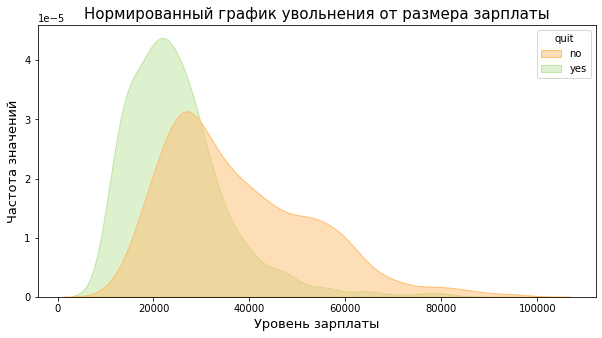

In [91]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=full_test_data, x='salary', hue='quit', common_norm=False,
           palette="Spectral", fill=True, alpha=.5)
plt.title('Нормированный график увольнения от размера зарплаты', fontsize=15)
plt.xlabel('Уровень зарплаты',fontsize=13)
plt.ylabel('Частота значений',fontsize=13);

Если смотреть на зарплату, то чем она меньше, тем больший шанс на увольнение у сотрудников.

После состовления данного портрета, можно проработать момент с junior, так как они самые уезвимые для увольнений. Особенно те, кто не сильно загружен или имеет низкую оценку руководителя.

## Задание 2 - Часть 4. Добавление нового признака, Обработка данных и Обучение модели

<a id='section18'></a> 
### Добавление нового признака

Начнем мы с добавления нового признака job_satisfaction_rate в наш датафрейм. У нас есть модель, которая сделает прогноз на основе имеющихся данных.

In [92]:
training_quit = training_quit.set_index('id')

Теперь удаляем дубликаты

In [93]:
training_quit = training_quit.drop_duplicates()

Формируем переменные для МО

In [94]:
X_test_job = training_quit.drop(['quit'], axis=1)

In [95]:
y_pred_tree_job = randomized_search.predict(X_test_job)

In [96]:
training_quit.insert(8, 'job_satisfaction_rate', y_pred_tree_job)

In [97]:
training_quit.head(5)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.645000,no
814010,sales,junior,medium,2,no,no,4,27600,0.838000,no
155091,purchasing,middle,medium,5,no,no,1,37200,0.351111,no
257132,sales,junior,medium,2,no,yes,3,24000,0.340000,yes
910140,marketing,junior,medium,2,no,no,5,25200,0.791667,no


<a id='section19'></a> 
### Создание полного пайплайна для поиска лучшей модели

Данный процес по структуре будет похож на создание пайплайна в задании 1. Единственное что стоит учесть, что у нас добавился новый признак для модели, поэтому добавим в наш пайплайн данный признак, а также сделаем предварительную кодировку целевого признака

In [98]:
target_quit = target_quit.set_index('id')

In [99]:
label_encoder = LabelEncoder()
training_quit['quit'] = label_encoder.fit_transform(training_quit['quit'])
target_quit['quit'] = label_encoder.fit_transform(target_quit['quit'])

Для начала создадим пайплайн для предобработки данных.

In [100]:
ohe_columns_clas = ['dept', 'last_year_promo', 'last_year_violations']

ord_columns_clas = ['level', 'workload']

num_columns_clas = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

ohe_pipe_clas = Pipeline(
    [
     ('simpleImputer_ohe_nan_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('simpleImputer_ohe', SimpleImputer(missing_values=' ', strategy='constant', fill_value=np.nan)),
     ('simpleImputer_ohe_nan_2', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

ord_pipe_clas = Pipeline(
    [
     ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('simpleImputer_ord_nan', SimpleImputer(missing_values=' ', strategy='constant', fill_value=np.nan)),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                    ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


data_preprocessor_clas = ColumnTransformer(
    [('ohe', ohe_pipe_clas, ohe_columns_clas),
     ('ord', ord_pipe_clas, ord_columns_clas),
     ('num', MinMaxScaler(), num_columns_clas)
    ], 
    remainder='passthrough', 
)

Создадим привычные переменные для модели.

In [101]:
full_test = test_sample.merge(target_feature, on='id', how='outer')
full_test = full_test.merge(target_quit, on='id', how='outer')

In [102]:
X_train_2 = training_quit.drop(['quit'], axis=1)

X_test_2 = full_test.drop(['quit'], axis=1)

y_train_2 = training_quit['quit']

y_test_2 = full_test['quit']

Собирем полный пайплайн

In [103]:
pipe_final_clas = Pipeline([
    ('preprocessor', data_preprocessor_clas),
    ('models', LogisticRegression())
])

Теперь создадим параметр для перебора моделей и их гиперпараметров

In [104]:
param_grid_clas = [
    # Создаем словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE,
                                          class_weight='balanced')],
        'models__max_depth': range(1, 25),
        'models__max_features': range(1, 25),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Создаем словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # Создаем словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear',
            class_weight='balanced')
                  ],
        'models__penalty' : ['l1','l2'],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search_clas = RandomizedSearchCV(
    pipe_final_clas, 
    param_grid_clas, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=100,
    random_state=RANDOM_STATE
)
randomized_search_clas.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', randomized_search_clas.best_params_)
print ('Метрика ROC_AUC лучшей модели на тренировочной выборке с кросвалидацией:',
       (randomized_search_clas.best_score_).round(3))

Лучшая модель и её параметры:

 {'preprocessor__num': StandardScaler(), 'models__n_neighbors': 46, 'models': KNeighborsClassifier()}
Метрика ROC_AUC лучшей модели на тренировочной выборке с кросвалидацией: 0.91


Перебрав 100 значений гиперпарамметров мы получили, лучшая модель это модель Ближайших соседей

Проверим сильно ли изменилась метрика на валидационной выборке

In [105]:
y_pred_val_proba = randomized_search_clas.predict_proba(X_test_2)
print(f'Метрика ROC_AUC на валидационной выборке: {roc_auc_score(y_test_2, y_pred_val_proba[:,1]).round(3)}')

Метрика ROC_AUC на валидационной выборке: 0.916


Как видим метрика не сильно изменилась, а также близка к требованиям заказчика, значит можем проверить данную модель на тестовой выборке

<a id='section20'></a> 
### Тестирование модели kNN

Делаем предсказания на нашей модели

In [106]:
y_pred_kNN_test = randomized_search_clas.predict_proba(X_test_2)

Выводим показатель нашей метрики ROC_AUC

In [107]:
print('Метрика ROC_AUC на тестовой выборке:', roc_auc_score(y_test_2, y_pred_kNN_test[:,1]).round(3))

Метрика ROC_AUC на тестовой выборке: 0.916


Метрика на тестовых данных соответствует ожидаемой метрики заказчика в размере более 0.91.

<a id='section21'></a> 
### Интерпритация результатов модели kNN

Для бизнеса очень важно не только попадать в метрику, но и понимать как модель мыслит.

Для интерпритации признаков воспользуемся методом SHAP. Построим график важности признаков. Да это займет время, для нелинейных моделей, но зато хорошо характеризует признаки. Возьмем 50 предсказании, чтобы модель не выводила показатель "целую вечность"

In [ ]:
ohe_pipe_clas.named_steps['ohe'].fit(X_train_2[ohe_columns_clas])
ohe_names = ohe_pipe_clas.named_steps['ohe'].get_feature_names_out()
all_feature_names = np.concatenate([ohe_names, ord_columns_clas, num_columns_clas])
all_feature_names

pipe_final_clas['preprocessor'].fit(X_train_2, y_train_2)

X_train_shap = pipe_final_clas.named_steps['preprocessor'].fit_transform(X_train_2)
X_test_shap = pipe_final_clas.named_steps['preprocessor'].transform(X_test_2)

knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_shap, y_train_2)

X=X_train_shap
X=pd.DataFrame(data=X, columns=all_feature_names)

explainer = shap.KernelExplainer(knn.predict_proba, X[:50])
shap_values = explainer.shap_values(X[:50])[:,:,1]


plt.title('Анализ важности признака', fontsize=15)
plt.ylabel('Названия признаков',fontsize=13)
    
shap.summary_plot(shap_values, X[:50], plot_size=(10,5))

  0%|          | 0/50 [00:00<?, ?it/s]

Самыми важными признаками для модели являются Уровень должности. Чем он ниже, тем выше принадлежность к 1 классу, а это увольнение. 2-ым фактором является загрузка, причем малозагруженные сотрудники увольняются чаще, средне загруженные повышают вероятность остаться в компании, а сильно загруженные находятся близко к "нейтральности" и не сильно влияют на предрасположенность к классу 1 или 0. Также Удовлетворенность тоже влияет на показатель увольнения, чем ниже удовлетворенность, тем больше шансов, что сотрудник уволится. Также влияет оценка руководителя, чем она ниже, тем больше шансов на увольнение. Самыми неважными факторами являются наличие предлоджения на повышение.

## Промежуточный вывод по заданию 2

В данном задании мы проверили несколько моделей для классификации. Подбор гиперпараметров является неотъемлимой частью идеального решения.

В нашем случае мы использовали модели Логистической регрессии, Дерева решении и Ближайших соседей. Модель дерева решении показала найлучший показатель метрики и справилась с требованиями заказчика. Если вычислительные мощности компьютера позволяют, то можно было использовать Grid Search для поиска лучшей модели, а также использовать больше гиперпараметров, для улучшения результатов. 

Помимо получения результатов очень важна их интерпритация. Как мы видели наша модель присвоила найбольшую важность признакам level, workload и job_satisfaction_rate, так что HR команде стоит сфокусироваться на них.

##  Общий вывод

Мы провели исследование, а также создали 2 модели МО для задачи регрессии и классификации. Одна модель предсказывает уровень удовлетворенности сотрудников, а вторая решает задачу бинарной классификации, чтобы отнести сотрудников с потенциальным риском к увольнению.

Во время предобработки мы столкнулись с некоторыми изменениями в данных, но все исправили в пайплайне, что гарантирует исправление таких вещей в проде, а также код не сломается в случае повторных появляении этих аномалии.

Чтобы найти лучшую модель мы использовали RandomizedSearchCV, чтобы оптимизировать время работы модели. Также мы вложили в пайплайн несколько кодировщиков (OneHotEncoder и OrdinalEncoder), для масштабирования количественных признаков мы переберали разные скаллеры (StandardScaler и MinMaxScaler), а также использовали 3 разные модели МО (DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression) для задачи классификации и 2 модели МО (DecisionTreeRegression и LinearRegression) для модели регресии.

Лучшей моделью для линейной регрессии оказалась Дерево решении, причем наш подбор гиперпарамметров не позволил нашей модели переобучится, а для задачи классификации лучшая модель Ближайших соседей.

По результатам анализа данной модели мы вычислили, что самыми важными факторами для определения увольнения сотрудника это его уровень навыка, загруженность, его удовлетворенность работы, а также удовлетворенность его руководителя. Некоторые из выводов модели мы видели на этапе создания "портрета пользователя", а модель дополнительно подтвердила полученные данные.

Проанализировав данные можно дать совет компании:
- Большое кол-во увольнений на этапе junior говорит либо о сложных задачах для новичков, либо о слабой поддержке в их обучении из-за чего они сами уходят или их увольняют.
- Слабая загрузка может быть результатом большого кол-ва junior , что может говорить об их переизбытке в компании, а значит можно расмотреть количество сотрудников в отделах. Возможно их много для текущих рабочих процессов
- Департамент в котором работает сотрудник не сильно влияет на увольнения, так как данные там равномерно распределены